### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included

### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### `sns.scatterplot()` Parameters:
- **`hue='sex'`**  
  Colors points by gender (categorical).  
  *Example:* Male (blue), Female (orange).  

- **`style='time'`**  
  Sets point shape by meal time (categorical).  
  *Example:* Lunch (○), Dinner (□).  

- **`size='size'`**  
  Scales point size by party size (numeric).  

### Visualized Dimensions:
| Axis/Attribute | Variable    | Type       |
|----------------|-------------|------------|
| X-axis         | `total_bill`| Numeric    |
| Y-axis         | `tip`       | Numeric    |
| Color          | `sex`       | Categorical|
| Shape          | `time`      | Categorical|
| Size           | `size`      | Numeric    |me

Size: size

<Axes: xlabel='total_bill', ylabel='tip'>

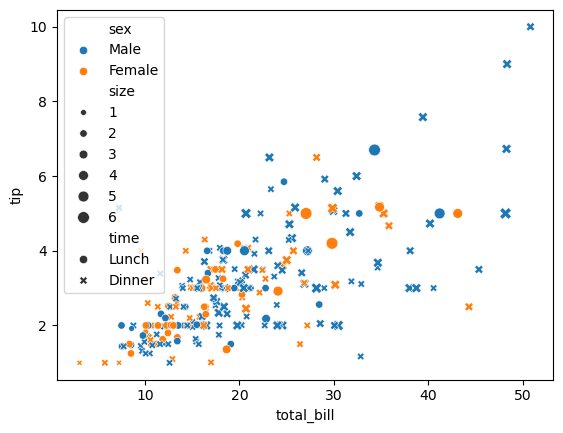

In [7]:
# scatter plot -> axes level function
sns.scatterplot(data=tips, x='total_bill', y='tip',hue='sex',style='time',size='size')

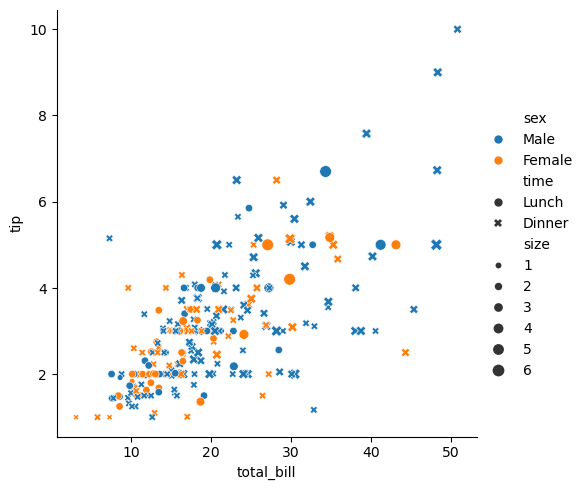

In [11]:
# relplot -> figure level -> square shape
# Figure level use krna jada best hai 
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter',hue='sex',style='time',size='size')

# style semantics

In [14]:
# line plot
gap = px.data.gapminder()
temp_df = gap[gap['country'] == 'India']   #--> It will only print the data for India 
temp_df

country continent  year  lifeExp         pop    gdpPercap iso_alpha  \
696   India      Asia  1952   37.373   372000000   546.565749       IND   
697   India      Asia  1957   40.249   409000000   590.061996       IND   
698   India      Asia  1962   43.605   454000000   658.347151       IND   
699   India      Asia  1967   47.193   506000000   700.770611       IND   
700   India      Asia  1972   50.651   567000000   724.032527       IND   
701   India      Asia  1977   54.208   634000000   813.337323       IND   
702   India      Asia  1982   56.596   708000000   855.723538       IND   
703   India      Asia  1987   58.553   788000000   976.512676       IND   
704   India      Asia  1992   60.223   872000000  1164.406809       IND   
705   India      Asia  1997   61.765   959000000  1458.817442       IND   
706   India      Asia  2002   62.879  1034172547  1746.769454       IND   
707   India      Asia  2007   64.698  1110396331  2452.210407       IND   

     iso_num  
696      356  
697      356  
698      356  
699      356  
700      356  
701      356  
702      356  
703      356  
704      356  
705      356  
706      356  
707      356

<Axes: xlabel='year', ylabel='lifeExp'>

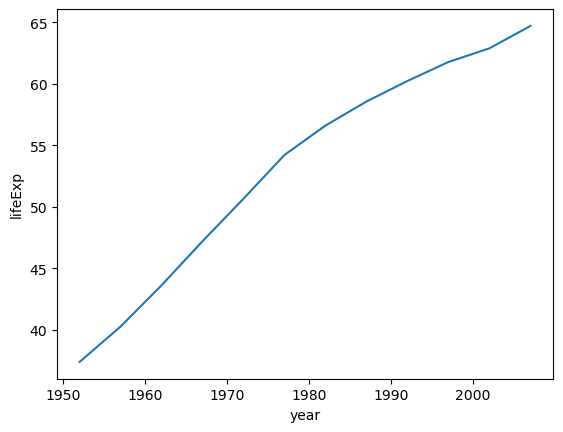

In [16]:
# axes level function
sns.lineplot(data=temp_df, x='year', y='lifeExp')

### `sns.relplot()` Line Plot Parameters:- **`kind='line'`**  
  Specifies a line plot (default is scatter plot if not specified).t s

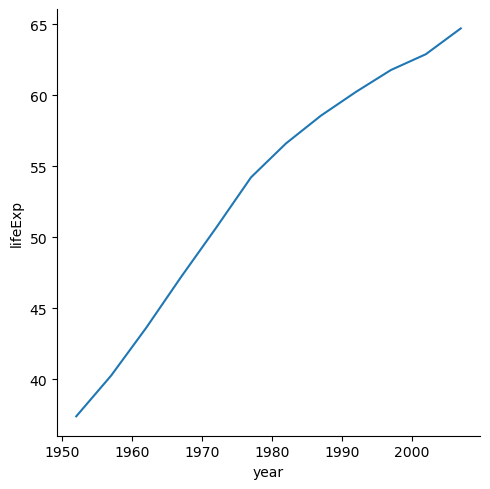

In [19]:
# using relpplot
sns.relplot(data=temp_df, x='year', y='lifeExp', kind='line')

In [21]:
# hue -> style
temp_df = gap[gap['country'].isin(['India','Brazil','Germany'])]
temp_df.head()

country continent  year  lifeExp        pop    gdpPercap iso_alpha  \
168  Brazil  Americas  1952   50.917   56602560  2108.944355       BRA   
169  Brazil  Americas  1957   53.285   65551171  2487.365989       BRA   
170  Brazil  Americas  1962   55.665   76039390  3336.585802       BRA   
171  Brazil  Americas  1967   57.632   88049823  3429.864357       BRA   
172  Brazil  Americas  1972   59.504  100840058  4985.711467       BRA   

     iso_num  
168       76  
169       76  
170       76  
171       76  
172       76

### Visual Encodings in `sns.relplot()`:
- **`hue='country'`** → Colors lines by **country** (categorical).  
- **`style='continent'`** → Changes line **style** (dashes/markers) by continent.  
- **`size='continent'`** → Adjusts line **thickness** by continent.  

### Effect:
- **3+ dimensions** visualized:  
  - `x` (year), `y` (lifeExp)  
  - Color (`country`), Line Style/Size (`continent`)

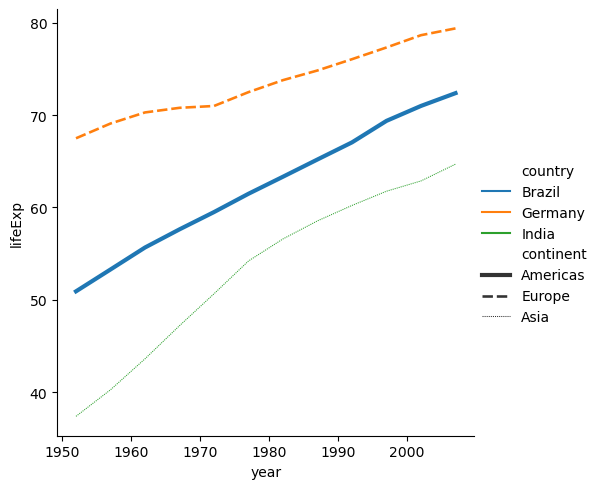

In [24]:
sns.relplot(kind='line', data=temp_df, x='year', y='lifeExp', hue='country', style='continent', size='continent')

<Axes: xlabel='year', ylabel='lifeExp'>

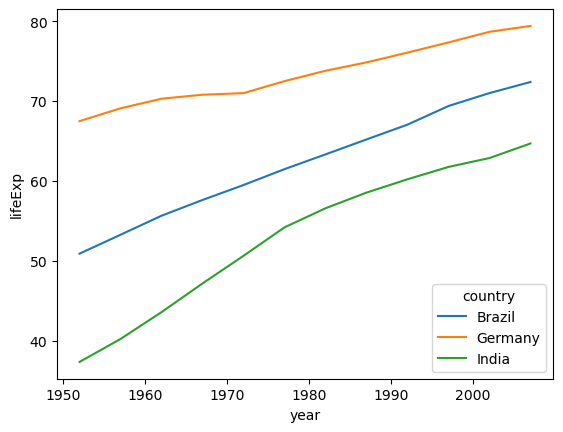

In [25]:
sns.lineplot(data=temp_df, x='year', y='lifeExp', hue='country')

### Faceted Line Plot using `sns.relplot()`

#### **1. Core Parameters**
- `data=tips`: Uses the `tips` DataFrame
- `x='total_bill'`: Sets x-axis to bill amount (numeric)
- `y='tip'`: Sets y-axis to tip amount (numeric)
- `kind='line'`: Specifies line plot (default: scatter)

#### **2. Faceting Parameters**
- `col='sex'`:  
  - Creates **column-wise subplots** (Male/Female)  
  - Number of columns = unique values in `sex` column (e.g., 2)
- `row='day'`:  
  - Creates **row-wise subplots** (Thur/Fri/Sat/Sun)  
  - Number of rows = unique values in `day` column (e.g., 4)

#### **3. Output Grid**
- Total subplots = `rows × cols` (e.g., 4 days × 2 sexes = **8 subplots**)  
- Each subplot shows:  
  - Line plot of `total_bill` vs `tip`  
  - Filtered by the specific `day` (row) and `sex` (column)

#### **4. Key Features**
- **Figure-level function**:  
  - Manages entire figure layout (unlike `scatterplot`/`lineplot`)  
  - Automatically adjusts axes scaling across subplots  
- **Customization**:  
  - Add `hue`/`style` to encode more variables within each subplot  
  - Control grid spacing with `height`/`aspect`  

#### **5. When to Use**
✔ Compare trends across categories (e.g., tips by gender/day)  
✔ Avoid overplotting in complex datasets  

#### **Example Output**

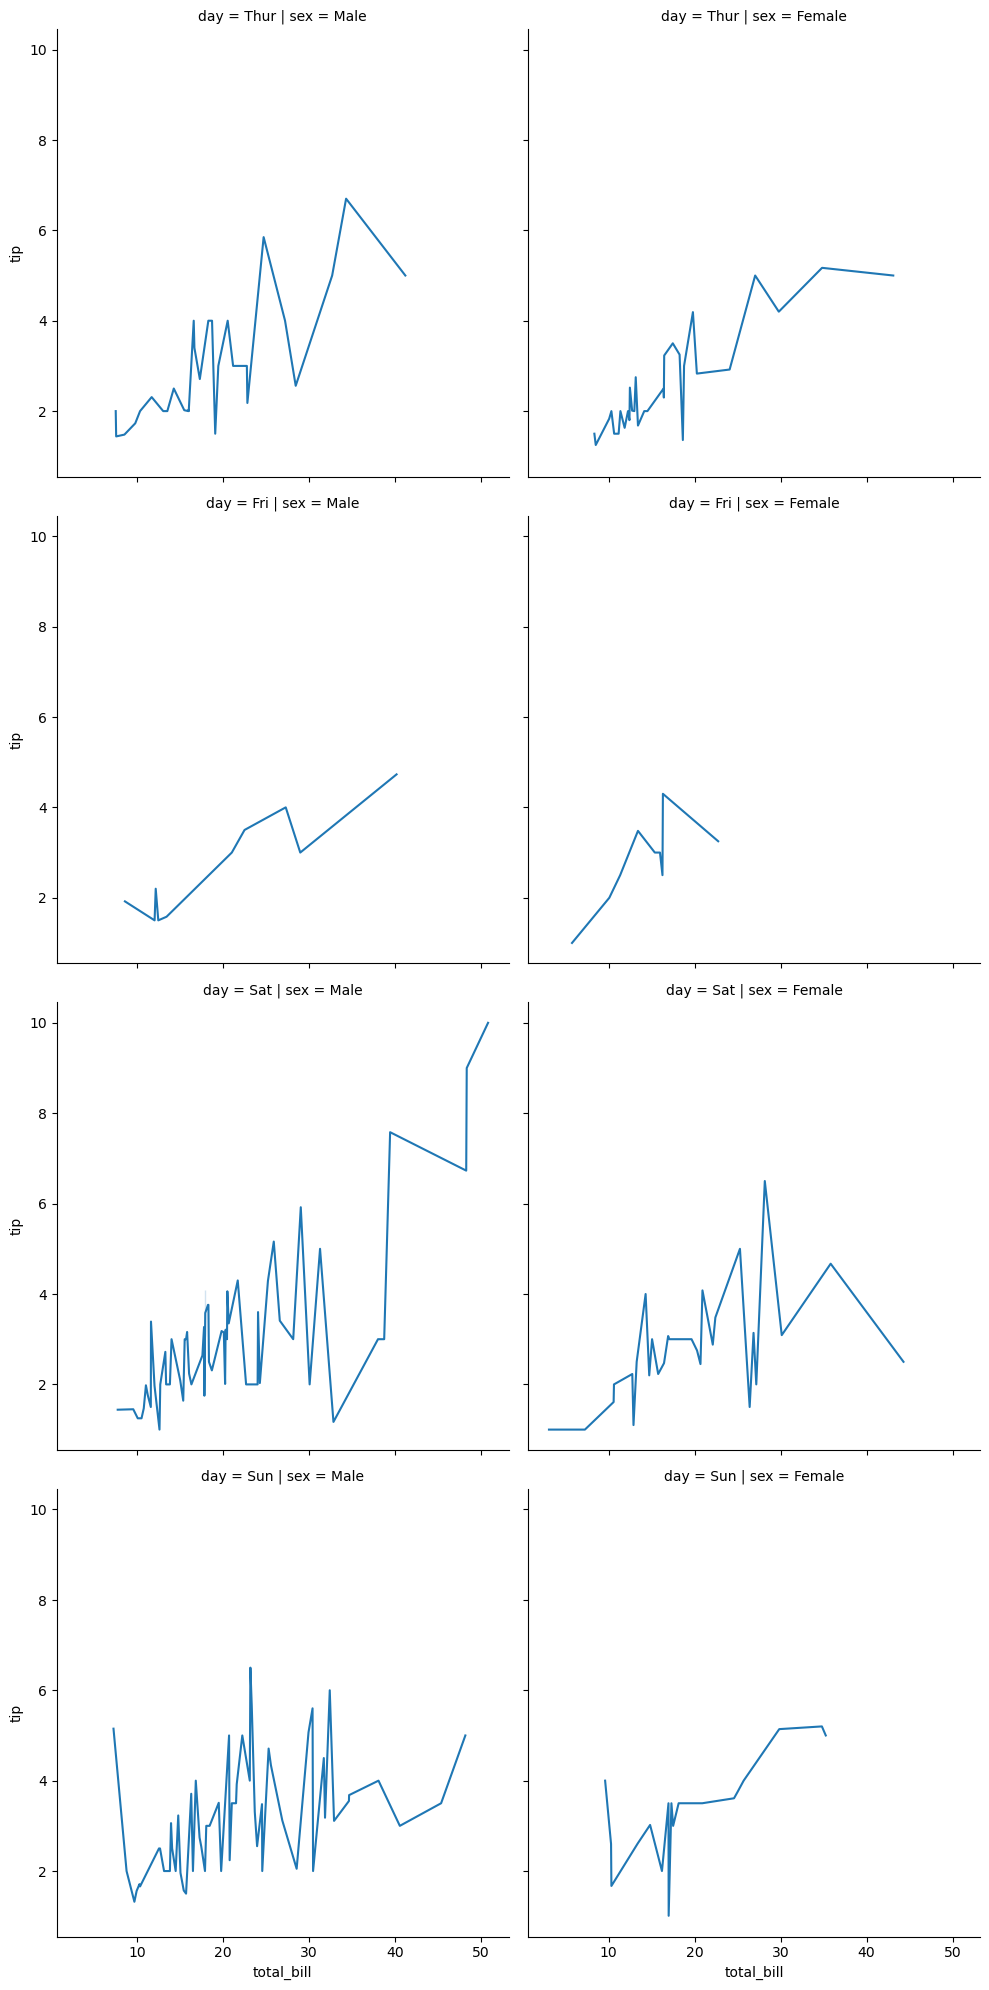

In [29]:
# facet plot -> onlt work with figure level function -> work with relplot
# it will not work with scatterplot and lineplot
sns.relplot(data=tips, x='total_bill', y='tip', kind='line', col='sex', row='day')

### Faceted Scatter Plot with `col_wrap`

#### **1. Core Parameters**
- `data=gap`: Uses the `gap` DataFrame
- `x='lifeExp'`: Life Expectancy (numeric, x-axis)
- `y='gdpPercap'`: GDP per capita (numeric, y-axis)
- `kind='scatter'`: Scatter plot (default, explicit here)

#### **2. Faceting & Wrapping**
- `col='year'`:  
  - Creates **subplots for each unique year**  
  - Number of columns = unique years in data (e.g., 12 years → 12 subplots)
- `col_wrap=3`:  
  - Wraps columns into **3 per row** (multi-line grid)  
  - Example: 12 years → 4 rows × 3 columns  

#### **3. Output Behavior**
- **Grid Layout**:  
  - Subplots flow left-to-right, top-to-bottom  
  - Avoids excessively wide single-row layouts  
- **Shared Axes**: All subplots use the same x/y scales by default  

#### **4. Use Case**
✔ Ideal for **many categories** (e.g., years, months)  
✔ Cleaner than single-row faceting (e.g., `col='year'` alone)  

#### **Example Output (12 years, `col_wrap=3`)**

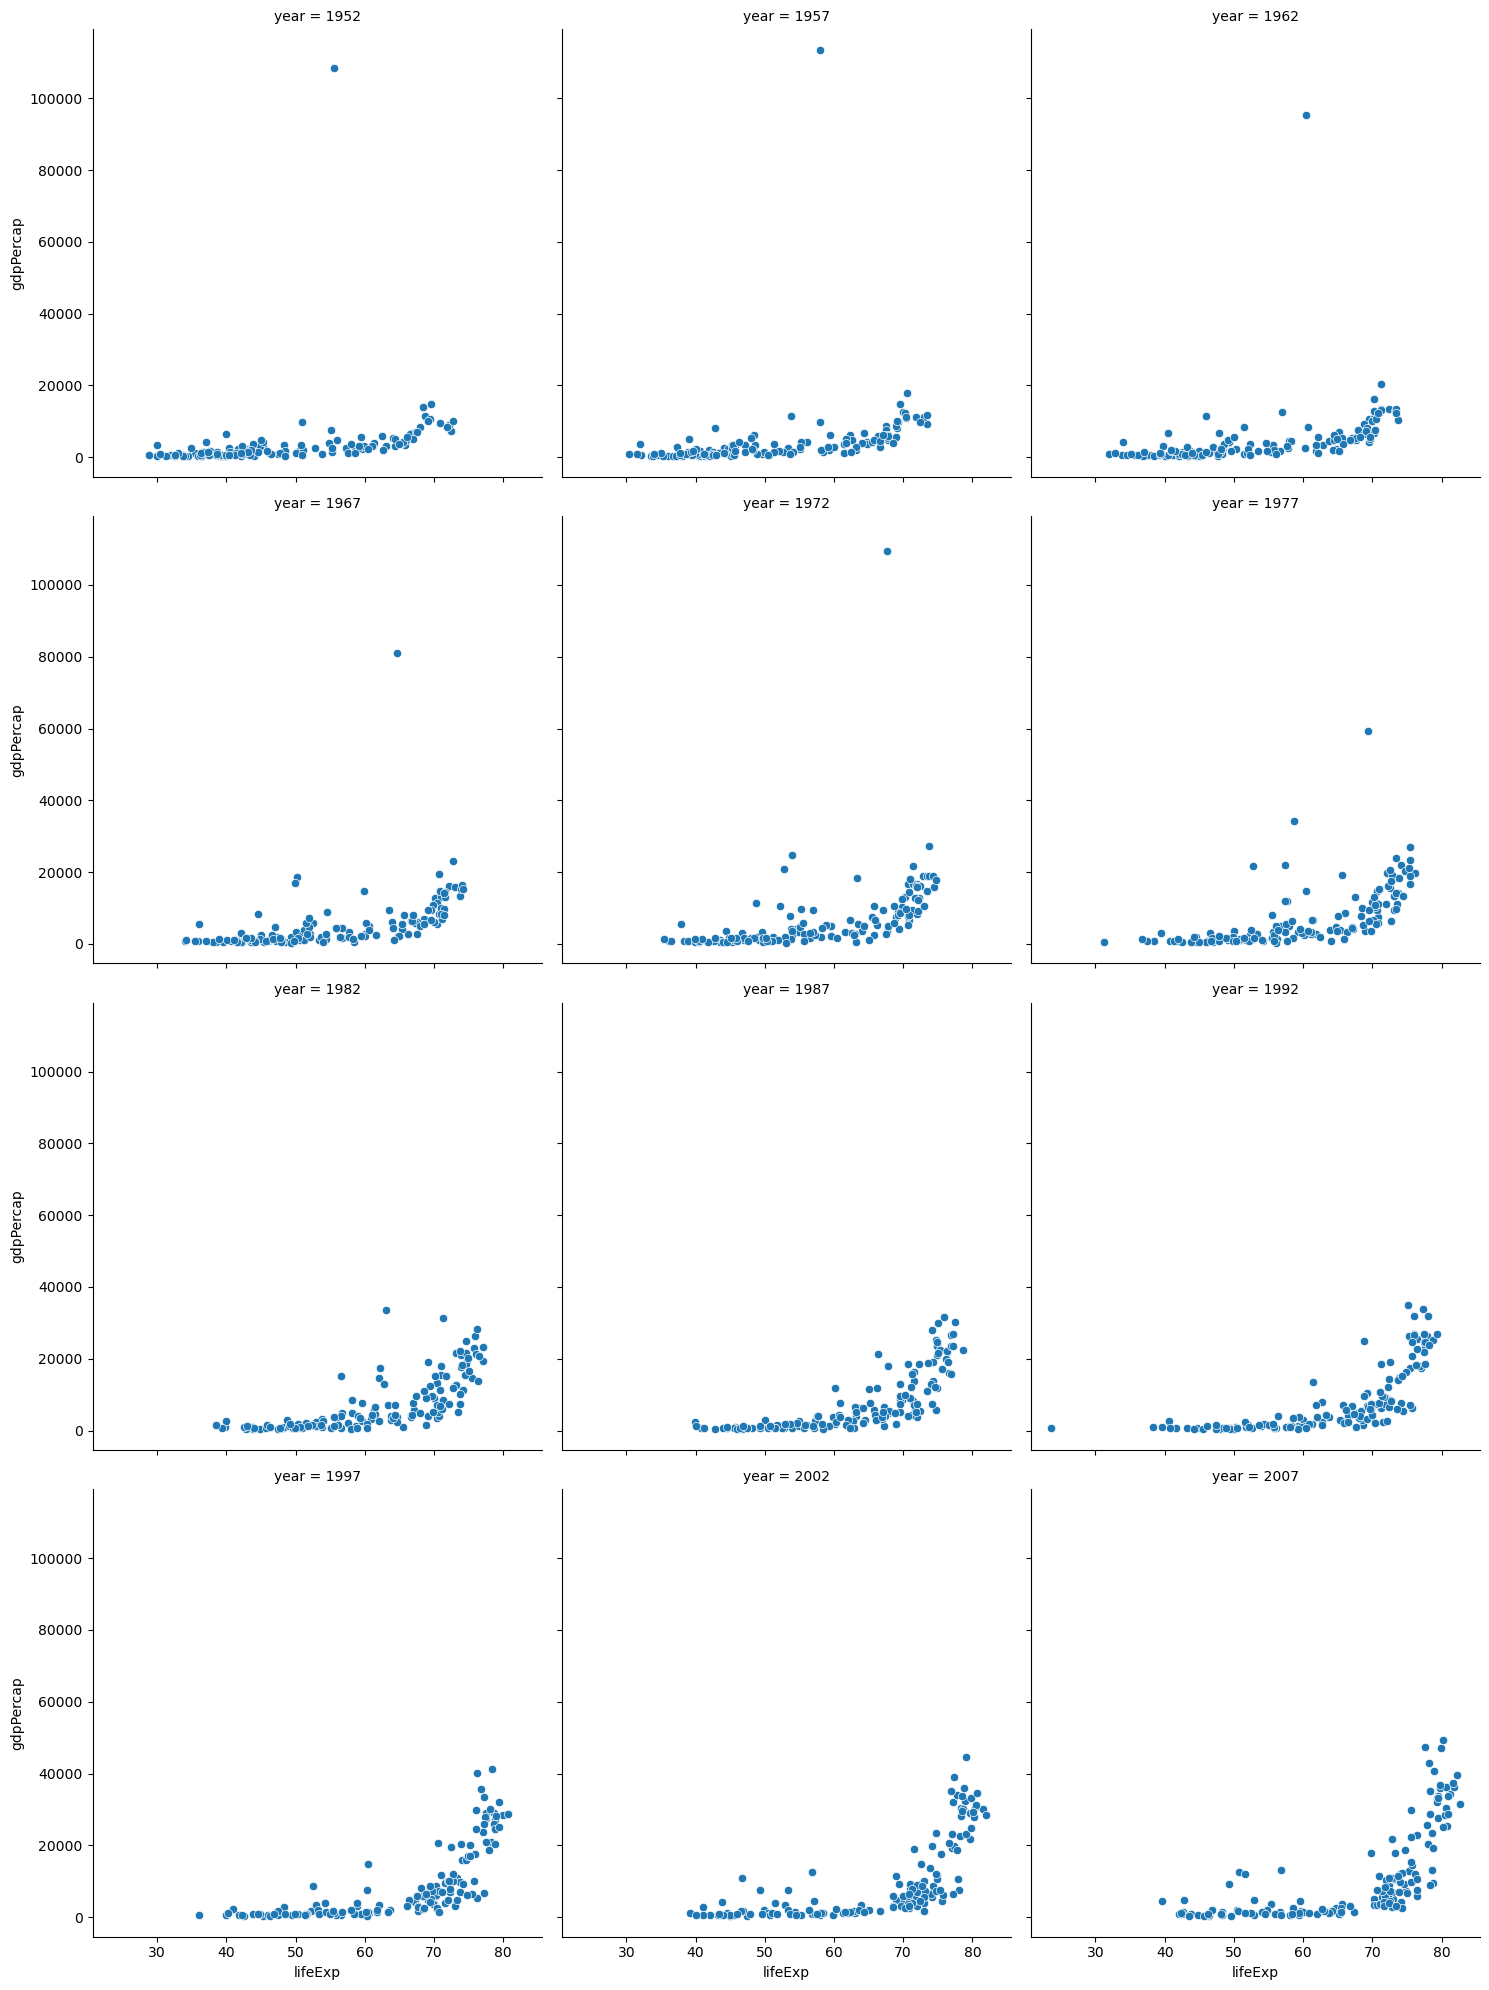

In [31]:
# col wrap
sns.relplot(data=gap, x='lifeExp', y='gdpPercap', kind='scatter', col='year', col_wrap=3)

# 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

# Seaborn Visualization Guide

## Figure-Level vs Axes-Level Functions

### Figure-Level (Multi-plot Grids)
- **`relplot`**: Faceted scatter/line plots (`col=`, `row=`, `col_wrap=`)
- **`displot`**: Faceted distribution plots (hist/kde/ecdf)
- **`catplot`**: Faceted categorical plots

### Axes-Level (Single Plots)
- **`scatterplot`**, **`lineplot`**, **`histplot`**, **`kdeplot`**, **`rugplot`**

---

## Key Plot Types and When to Use Them

### 1. Distribution Plots
| Plot | When to Use | Example |
|------|------------|---------|
| **`histplot`** | Exact frequency counts, binned data | `sns.histplot(data, x='age', bins=20)` |
| **`kdeplot`** | Smooth density estimation | `sns.kdeplot(data, x='income', fill=True)` |
| **`rugplot`** | Show individual data points | `sns.rugplot(data, x='height')` |

**Combinations**:
- Hist + KDE: `sns.histplot(..., kde=True)`
- KDE + Rug: Add `rugplot` under KDE

### 2. Relational Plots
| Plot | When to Use | Example |
|------|------------|---------|
| **`scatterplot`** | Numeric-numeric relationships | `sns.scatterplot(x='price', y='sales')` |
| **`lineplot`** | Trends over time/order | `sns.lineplot(x='year', y='revenue')` |

**Enhancements**:
- `hue`: Color by category
- `style`: Different markers
- `size`: Vary point sizes

### 3. Faceting (Figure-Level)
```python
sns.relplot(..., col='region', row='year')  # Grid layout
sns.relplot(..., col='month', col_wrap=4)   # Wrapped layout

<Axes: xlabel='total_bill', ylabel='Count'>

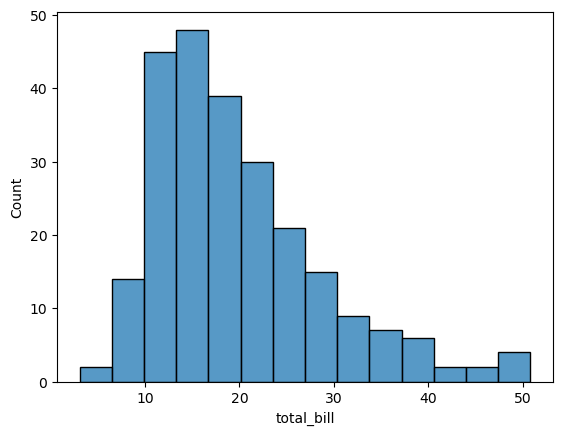

In [34]:
# plotting univariate histogram
sns.histplot(data=tips, x='total_bill')

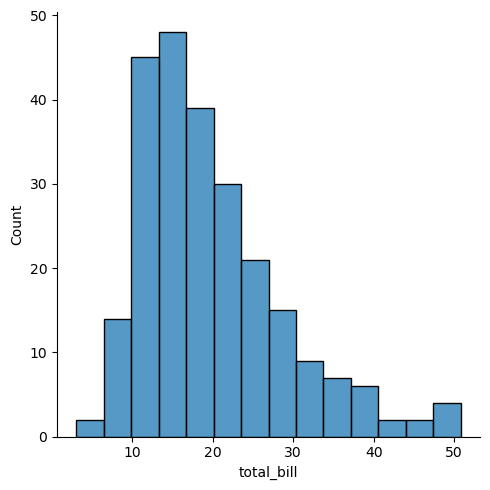

In [36]:
sns.displot(data=tips, x='total_bill', kind='hist')

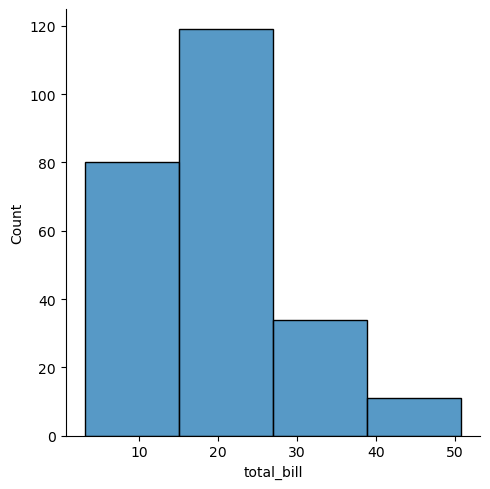

In [40]:
# bins parameter
sns.displot(data=tips, x='total_bill', kind='hist',bins=4)

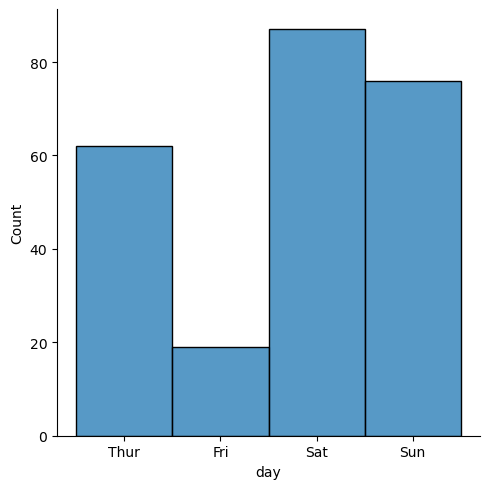

In [42]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram. 
# Discrete bins are automatically set for categorical variables

# countplot

sns.displot(data=tips, x='day', kind='hist') 

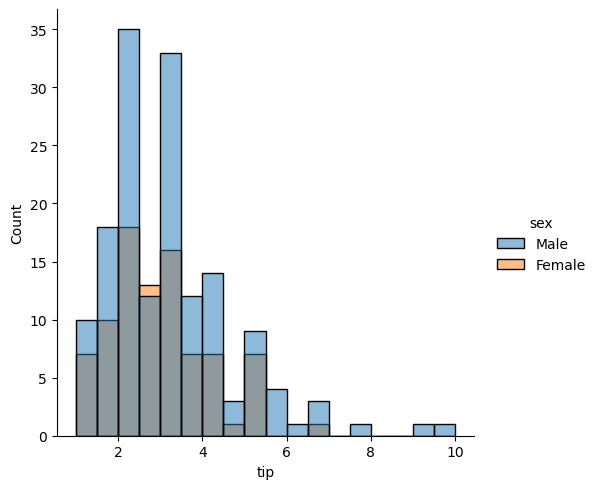

In [44]:
# hue parameter
sns.displot(data=tips, x='tip', kind='hist',hue='sex')

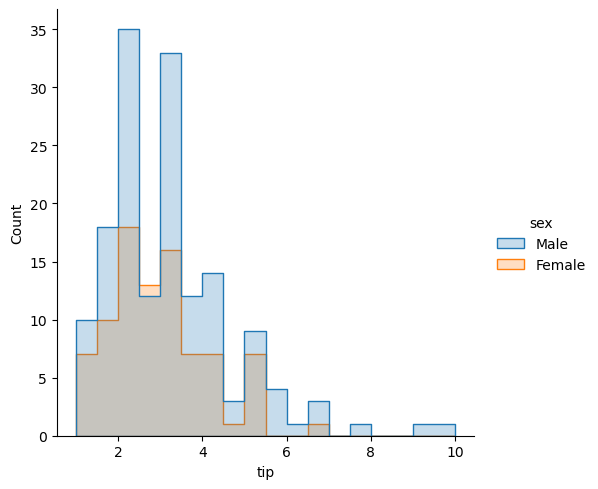

In [46]:
# element -> step it will give us a slightly better picture
sns.displot(data=tips, x='tip', kind='hist',hue='sex',element='step')

In [48]:
titanic = sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

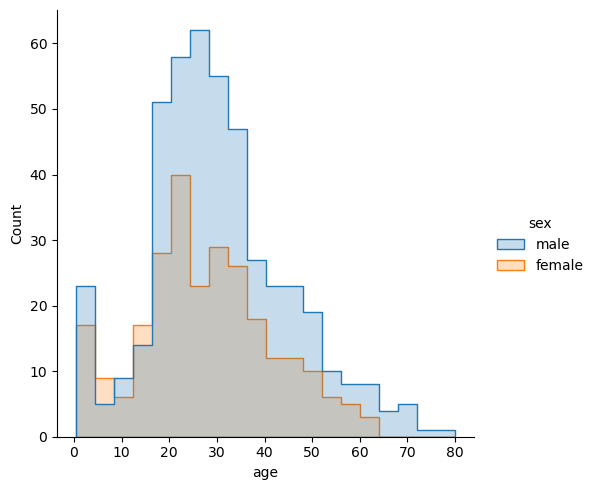

In [50]:
sns.displot(data=titanic, x='age', kind='hist',element='step',hue='sex')

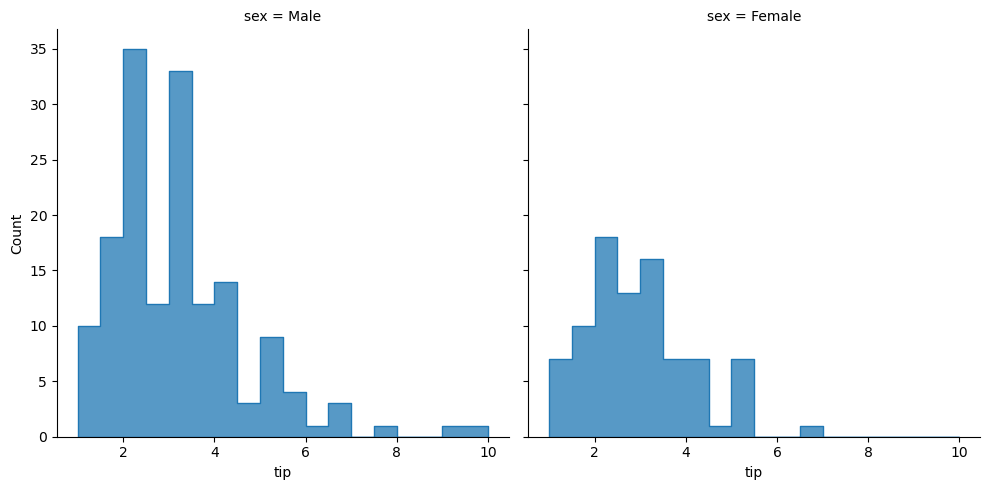

In [52]:
# faceting using col and row -> not work on histplot function
sns.displot(data=tips, x='tip', kind='hist',col='sex',element='step')

<Axes: xlabel='total_bill', ylabel='Density'>

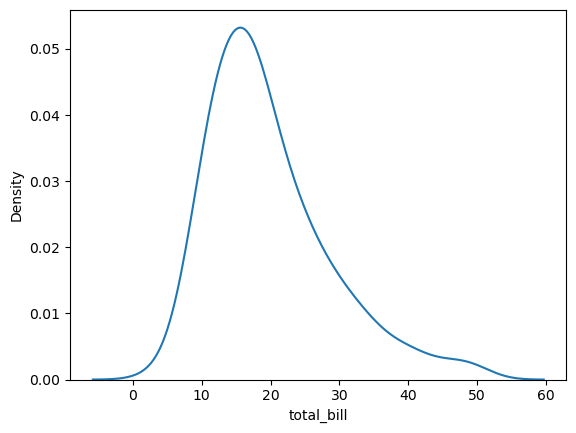

In [54]:
# kdeplot
# Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.kdeplot(data=tips,x='total_bill')

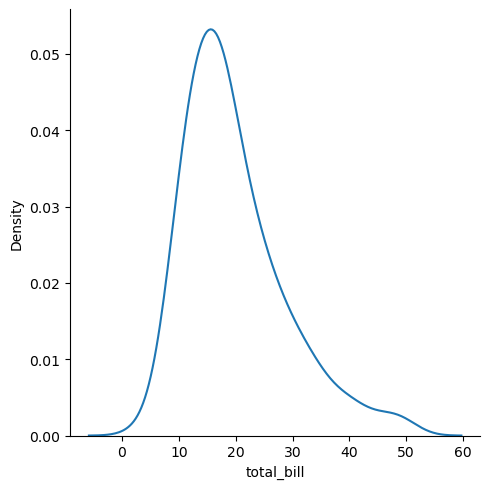

In [56]:
sns.displot(data=tips,x='total_bill',kind='kde')

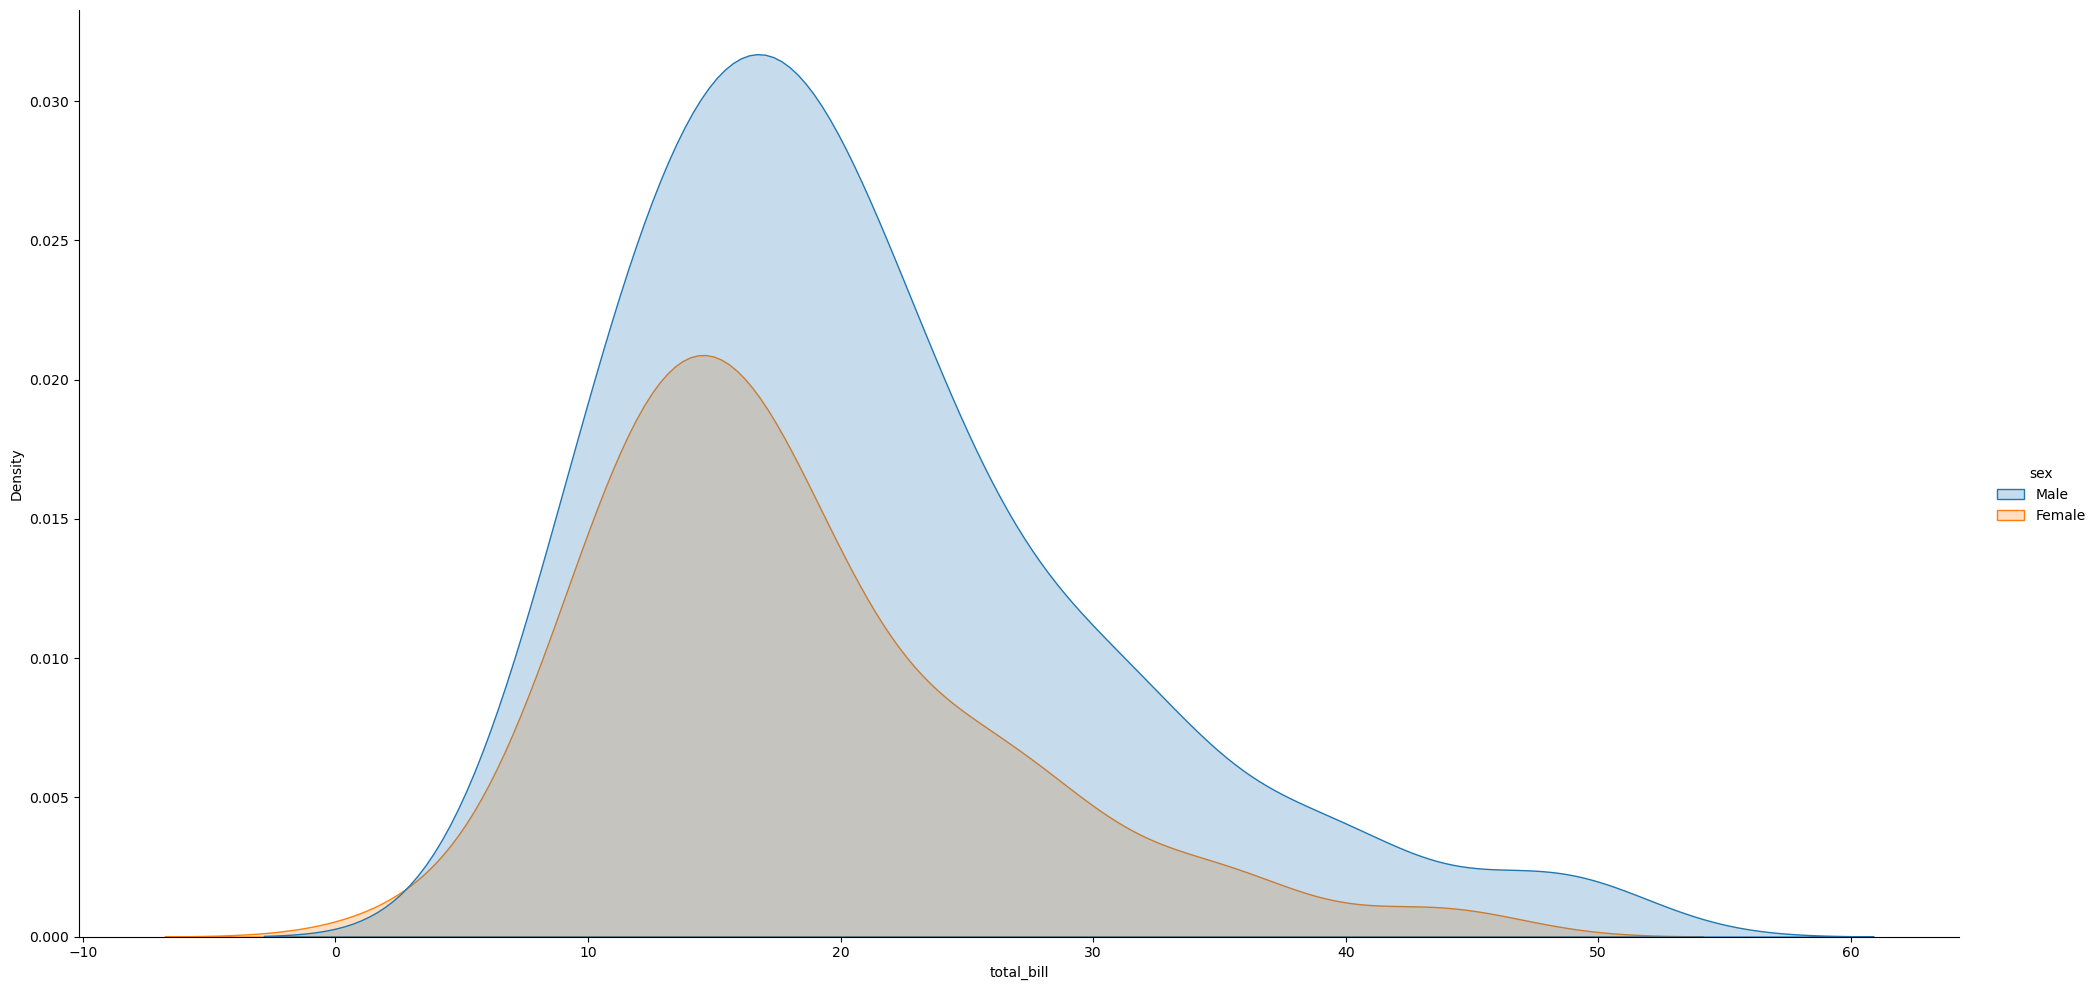

In [58]:
# hue -> fill
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10,aspect=2)

<Axes: xlabel='total_bill', ylabel='Density'>

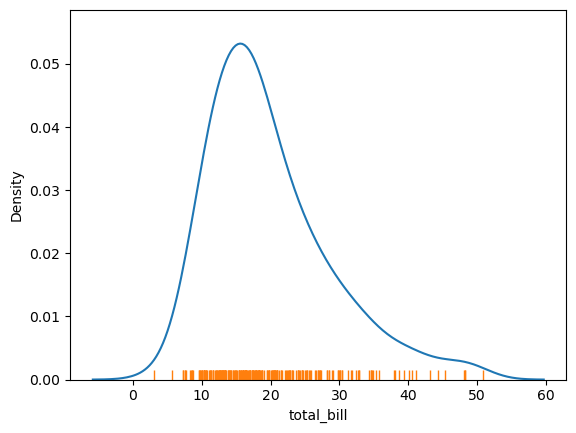

In [60]:
# Rugplot

# Plot marginal distributions by drawing ticks along the x and y axes.

# This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.
sns.kdeplot(data=tips,x='total_bill')
sns.rugplot(data=tips,x='total_bill')

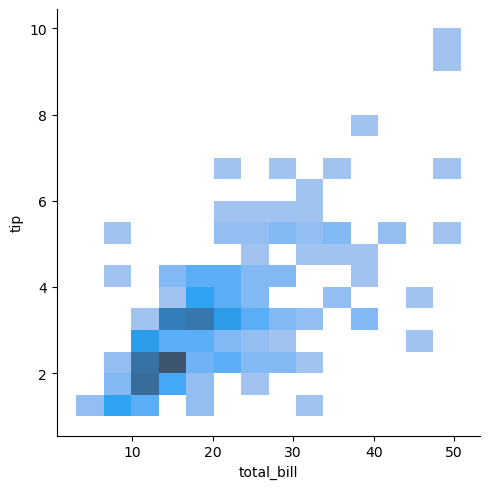

In [62]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot 
# and then shows the count of observations within each rectangle with the fill color

# sns.histplot(data=tips, x='total_bill', y='tip')
sns.displot(data=tips, x='total_bill', y='tip',kind='hist')

<Axes: xlabel='total_bill', ylabel='tip'>

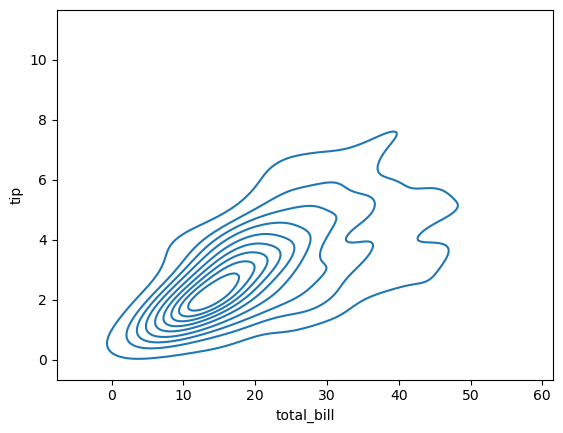

In [64]:
# Bivariate Kdeplot
# a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian
sns.kdeplot(data=tips, x='total_bill', y='tip')

### 2. Matrix Plot

- Heatmap
- Clustermap

# Seaborn Visualization Guide

## Matrix Plots (For Tabular Data)

### 1. Heatmap (`sns.heatmap`)
**When to Use**:
- Visualizing matrix-like data (correlation matrices, confusion matrices)
- Showing magnitude through color gradients
- Identifying patterns in rectangular data

**Key Features**:
- Color mapping with `cmap=`
- Annotations with `annot=True`
- Custom normalization (`vmin=`, `vmax=`)

**Example**:
```python
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='year', ylabel='country'>

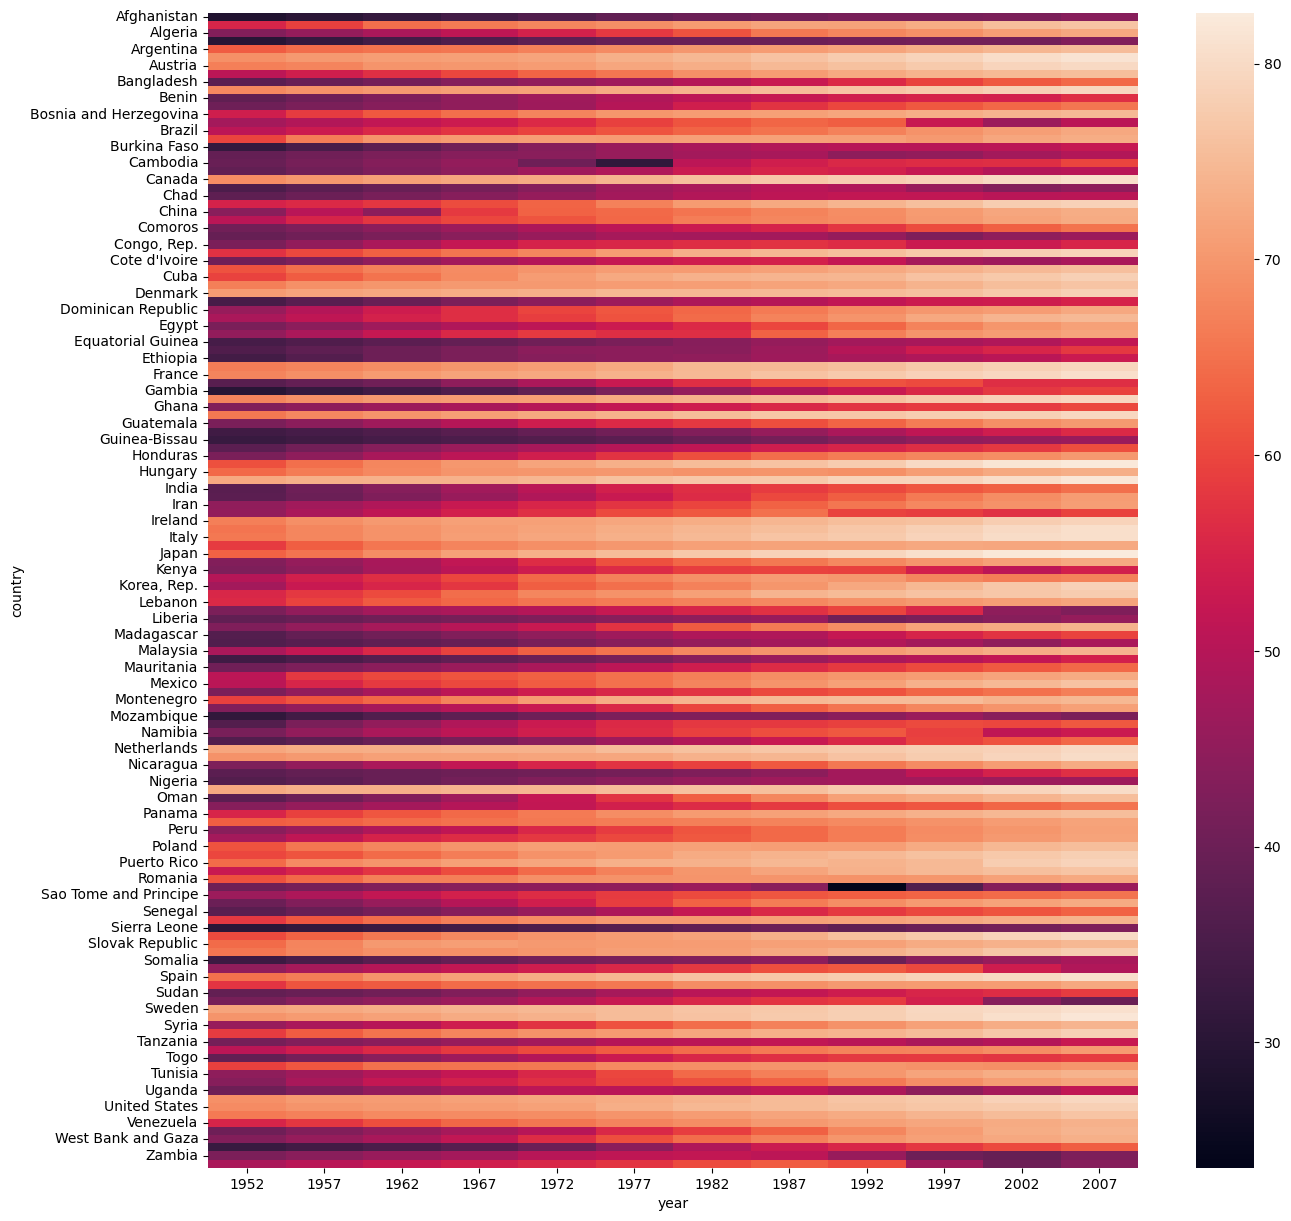

In [68]:
# Heatmap

# Plot rectangular data as a color-encoded matrix
temp_df = gap.pivot(index='country',columns='year',values='lifeExp')

# axes level function
plt.figure(figsize=(15,15))
sns.heatmap(temp_df)

<Axes: xlabel='year', ylabel='country'>

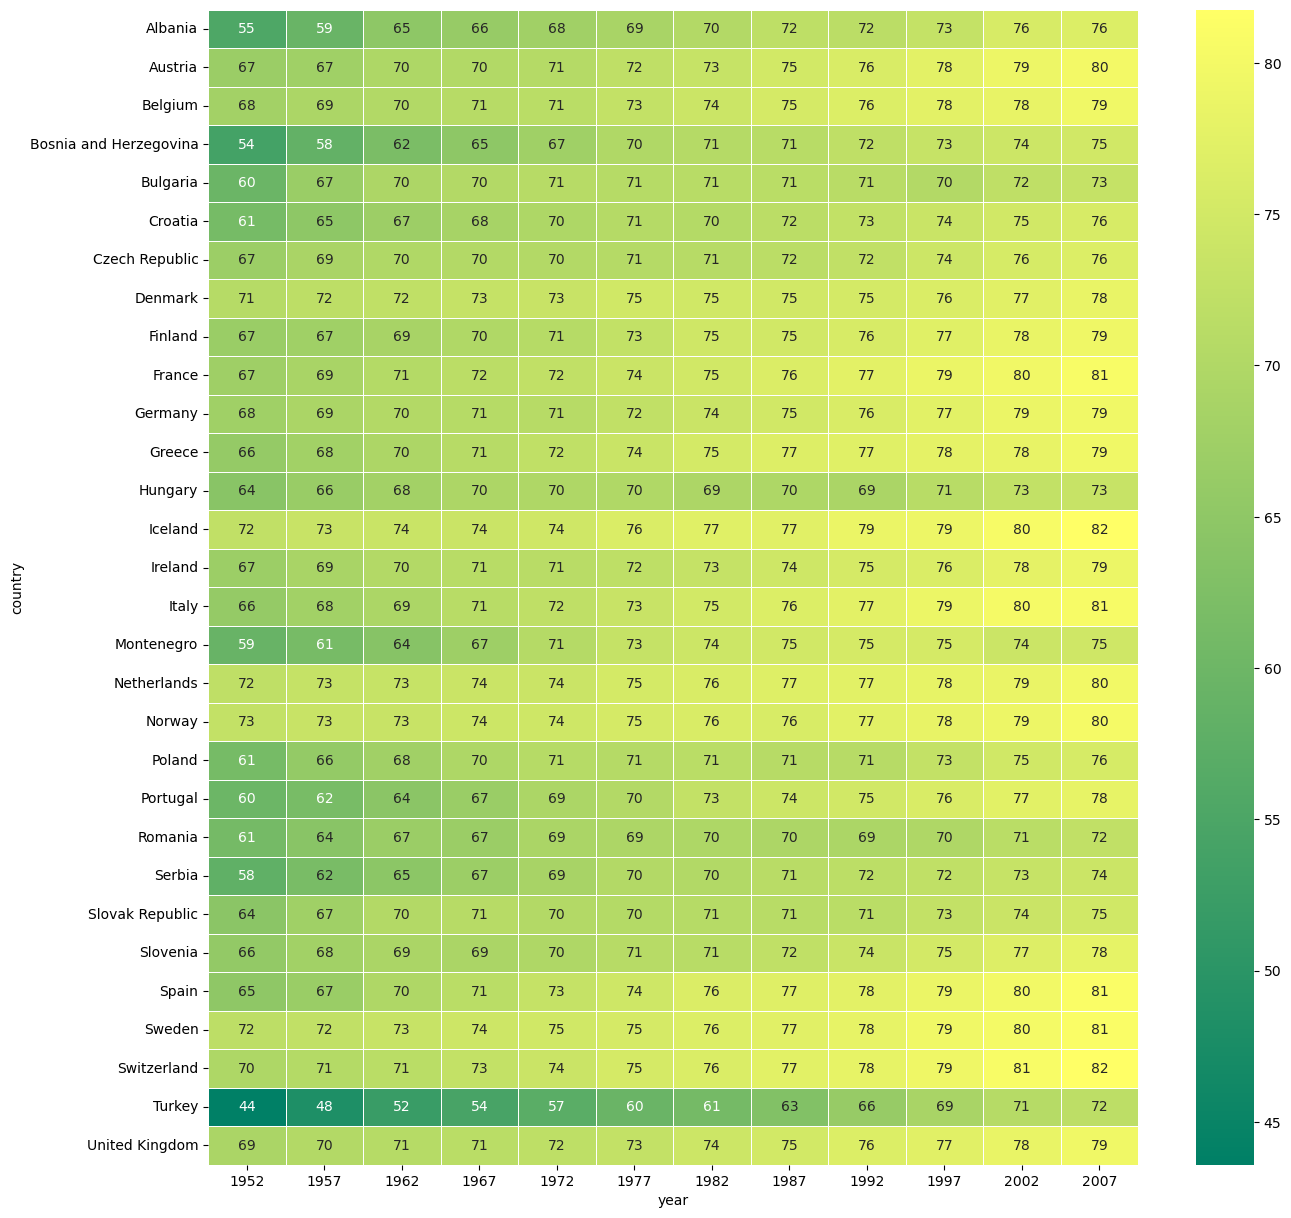

In [69]:
# annot
temp_df = gap[gap['continent'] == 'Europe'].pivot(index='country',columns='year',values='lifeExp')

plt.figure(figsize=(15,15))
sns.heatmap(temp_df,annot=True,linewidth=0.5, cmap='summer')

### Clustermap (`sns.clustermap`)

#### When to Use:
- **Hierarchical clustering** of heatmap data  
- Exploring **patterns** in high-dimensional data  
- **Reordering** rows/columns by similarity  
- **Grouping** similar observations/features  

#### Key Features:
| Parameter | Description | Example Values |
|-----------|-------------|----------------|
| `method`  | Clustering algorithm | `'ward'`, `'average'`, `'single'` |
| `metric`  | Distance metric | `'euclidean'`, `'correlation'` |
| `standard_scale` | Normalize rows (0) or cols (1) | `0`, `1` |
| `z_score` | Standardize rows (0) or cols (1) | `0`, `1` |
| `cmap`    | Color palette | `'viridis'`, `'coolwarm'` |
| `figsize` | Figure dimensions | `(10, 8)` |

#### Example:
```python
sns.clustermap(
    data=df.corr(),
    method='average',
    metric='correlation',
    cmap='vlag',
    figsize=(12, 10)
)

In [71]:
# Clustermap

# Plot a matrix dataset as a hierarchically-clustered heatmap.

# This function requires scipy to be available.

iris = px.data.iris()
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

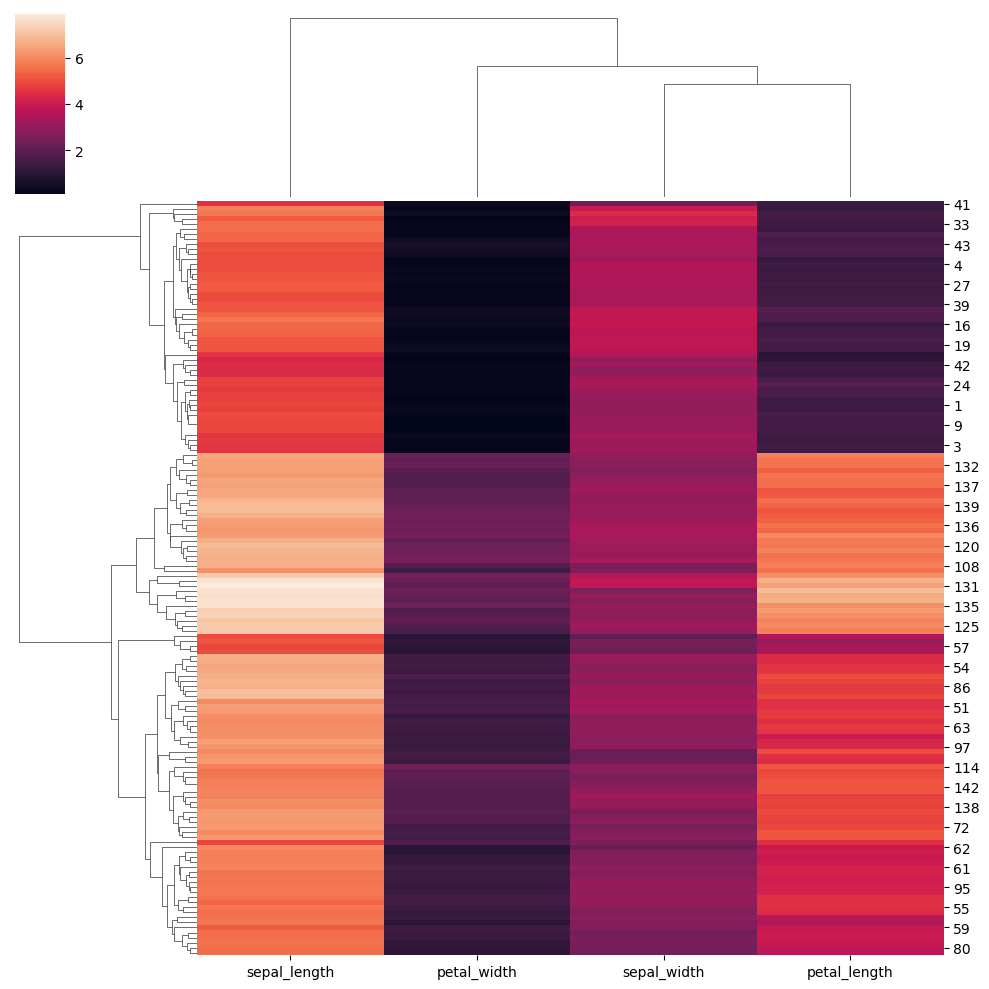

In [73]:
sns.clustermap(iris.iloc[:,[0,1,2,3]])

In [77]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

<Axes: xlabel='total_bill', ylabel='tip'>

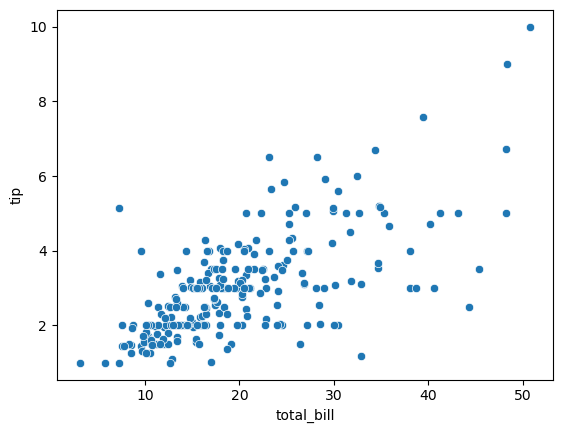

In [80]:
sns.scatterplot(data=tips, x='total_bill',y='tip')

<Axes: xlabel='day', ylabel='total_bill'>

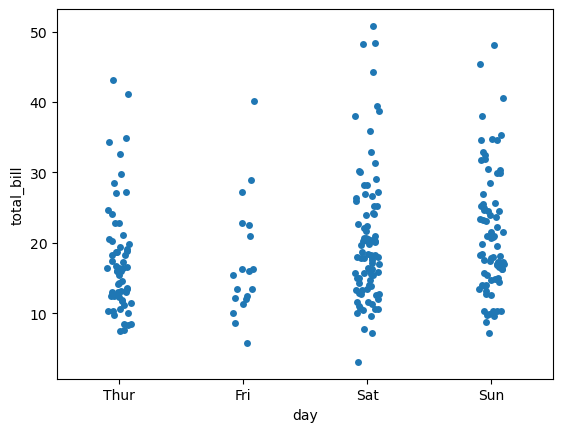

In [82]:
# strip plot
# axes level function
sns.stripplot(data=tips,x='day',y='total_bill')

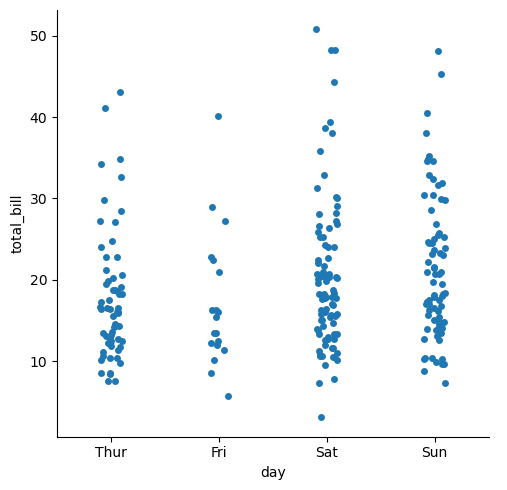

In [84]:
# using catplot
# figure level function
sns.catplot(data=tips, x='day',y='total_bill',kind='strip')

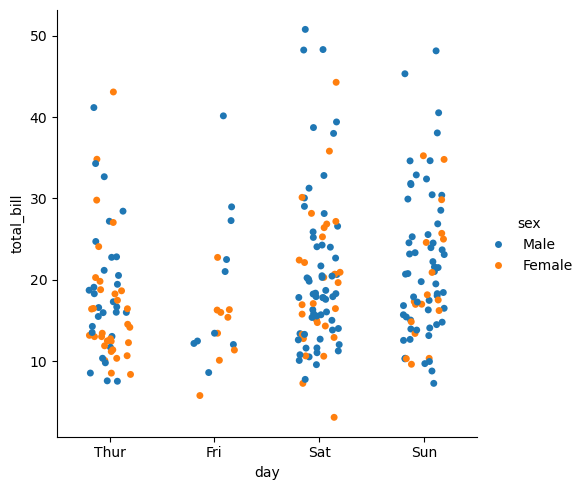

In [86]:
# jitter
sns.catplot(data=tips, x='day',y='total_bill',kind='strip',jitter=0.2,hue='sex')

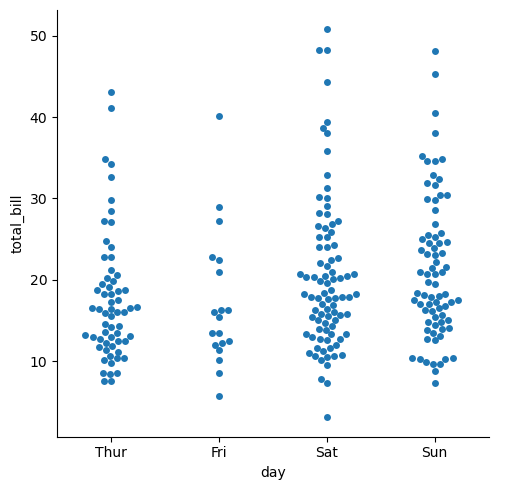

In [88]:
# swarmplot
sns.catplot(data=tips, x='day',y='total_bill',kind='swarm')

<Axes: xlabel='day', ylabel='total_bill'>

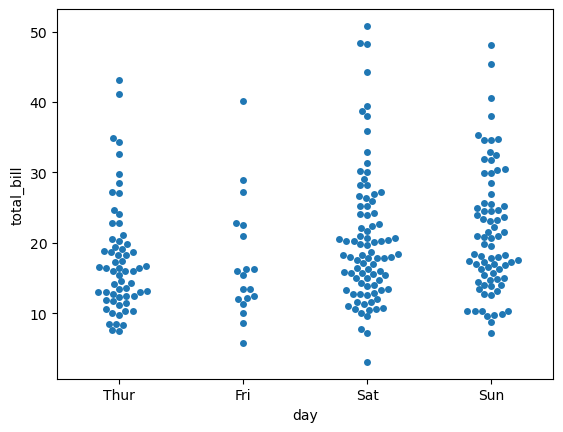

In [90]:
sns.swarmplot(data=tips, x='day',y='total_bill')

<Axes: xlabel='day', ylabel='total_bill'>

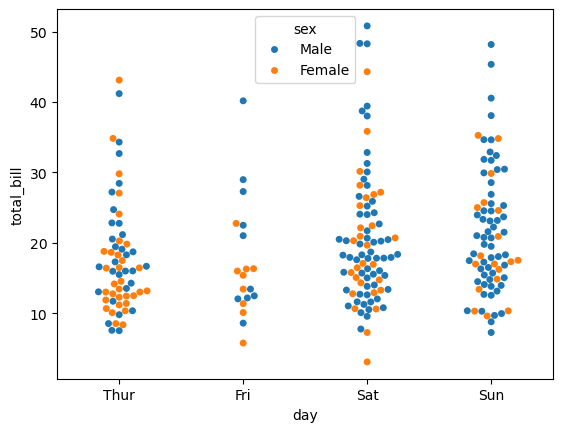

In [92]:
# hue
sns.swarmplot(data=tips, x='day',y='total_bill',hue='sex')

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

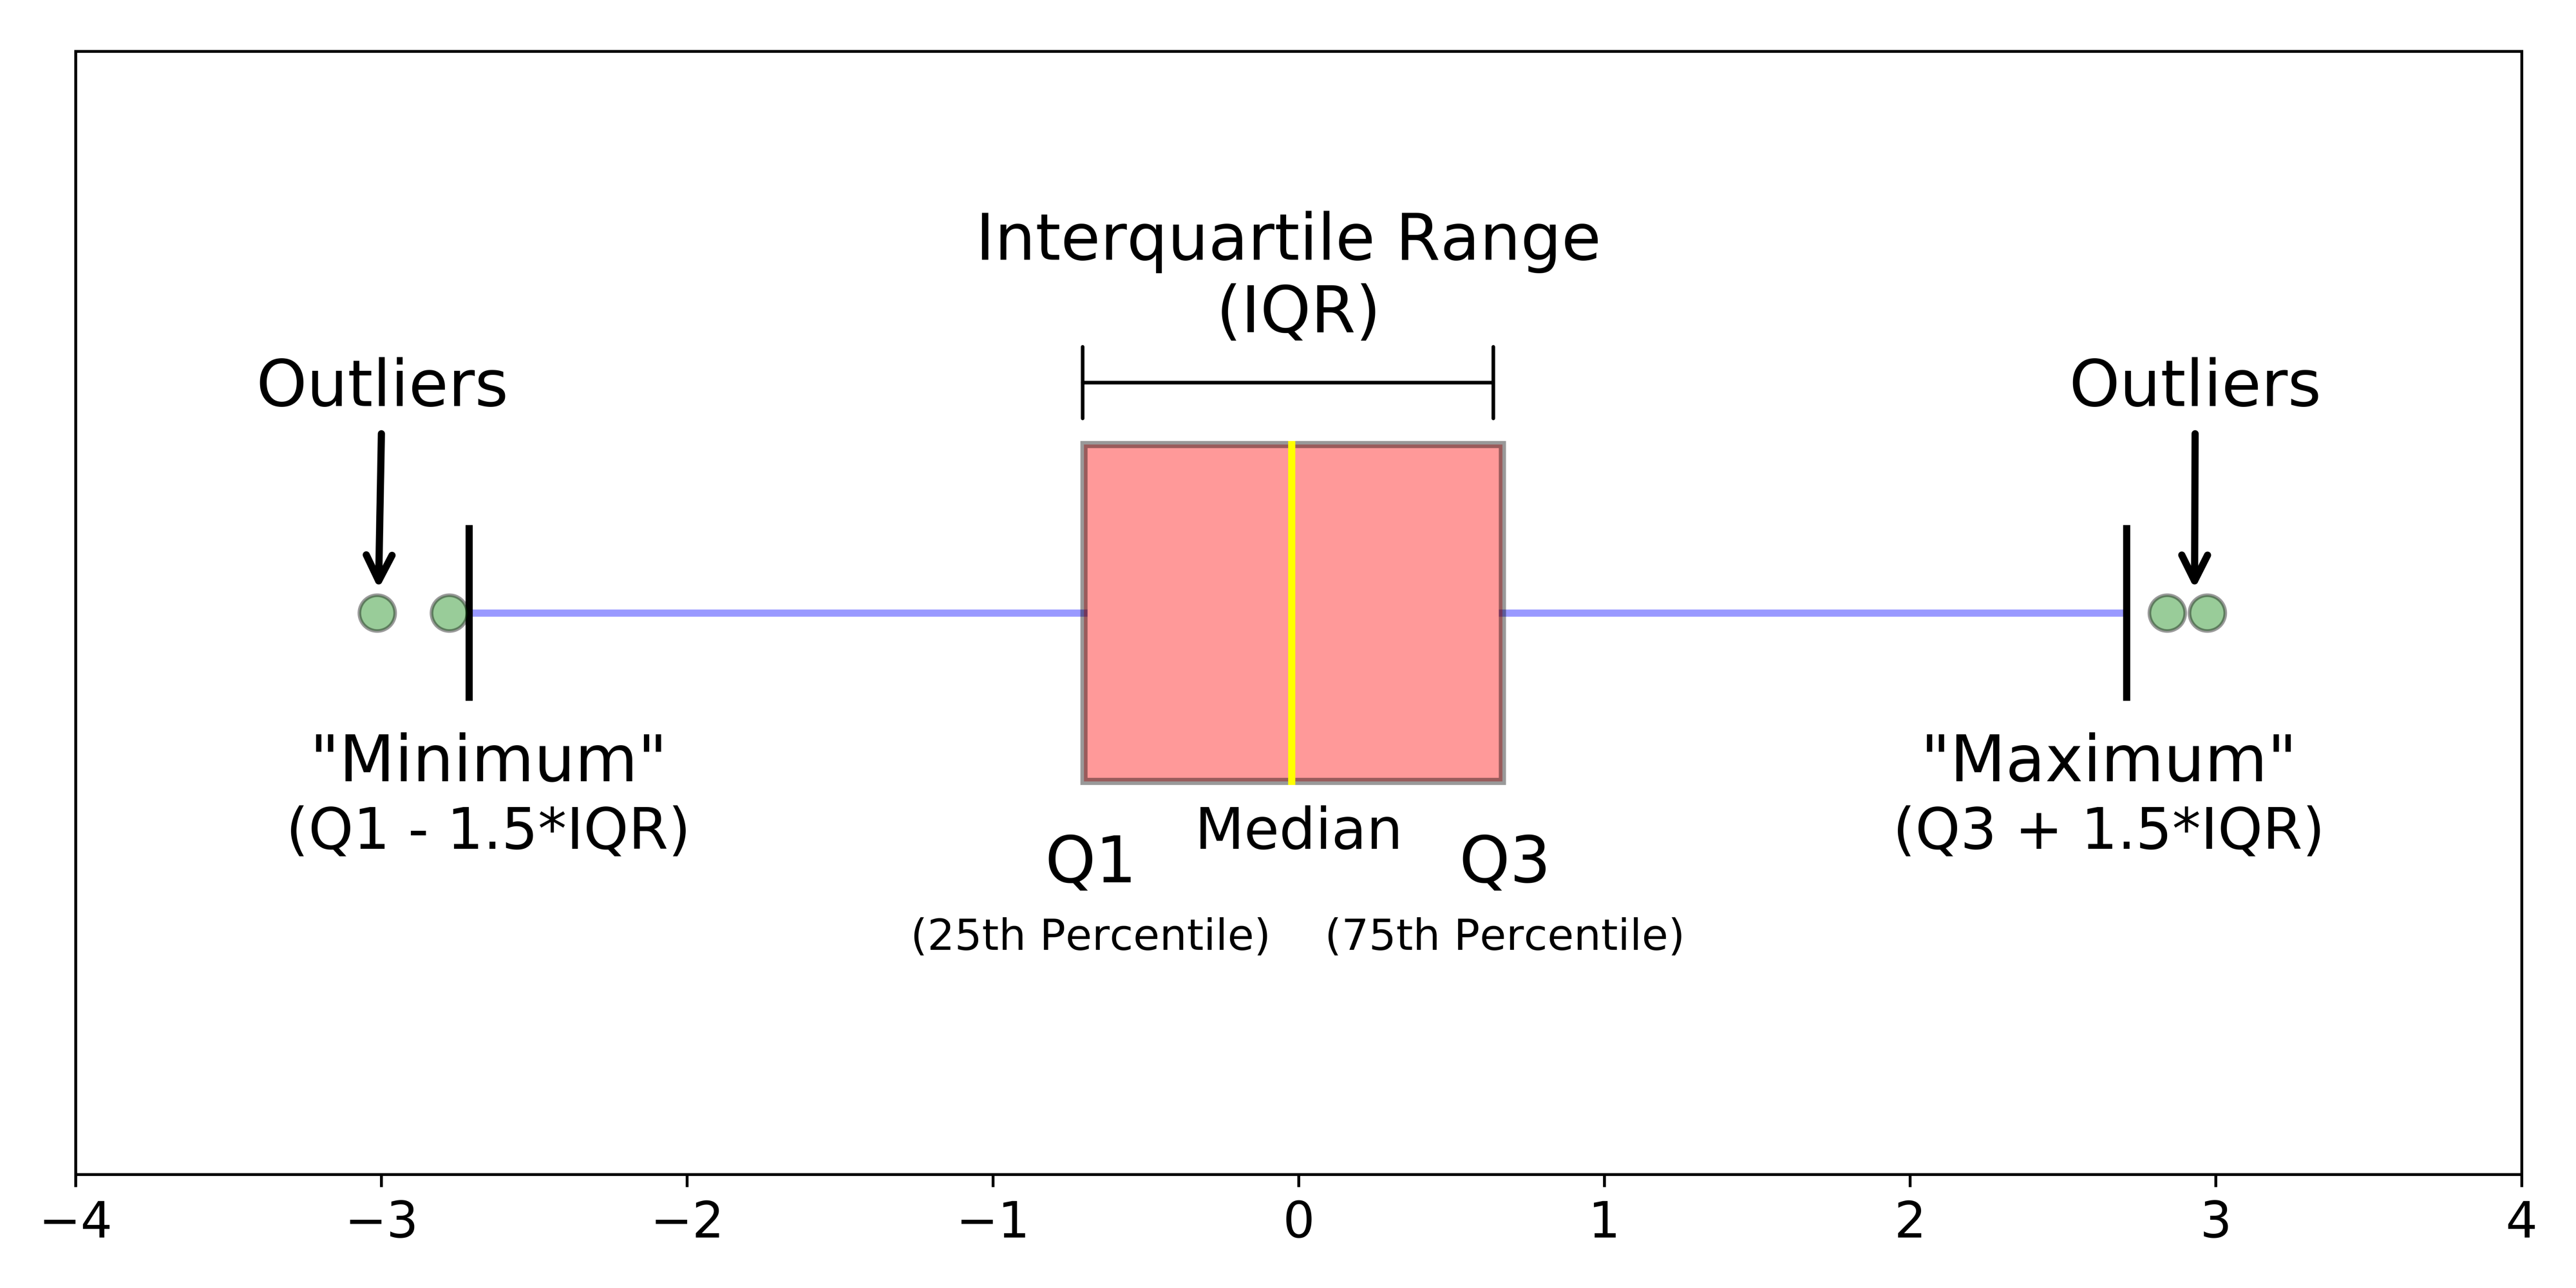

<Axes: xlabel='day', ylabel='total_bill'>

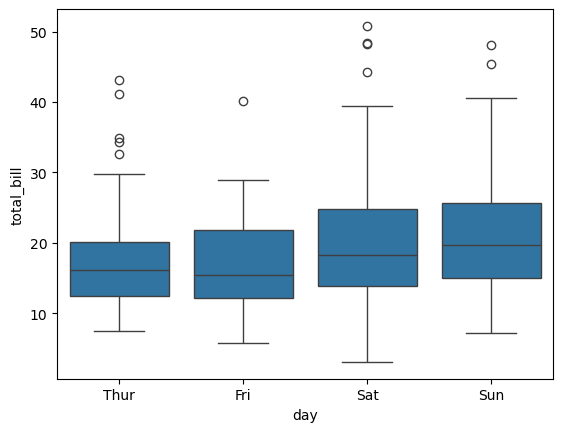

In [95]:
# Box plot
sns.boxplot(data=tips,x='day',y='total_bill')

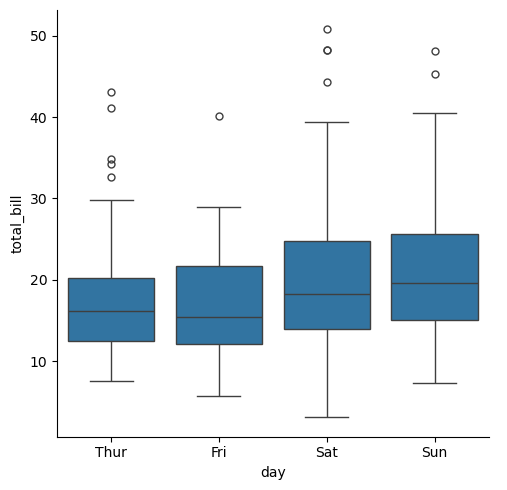

In [97]:
# Using catplot
sns.catplot(data=tips,x='day',y='total_bill',kind='box')

<Axes: xlabel='day', ylabel='total_bill'>

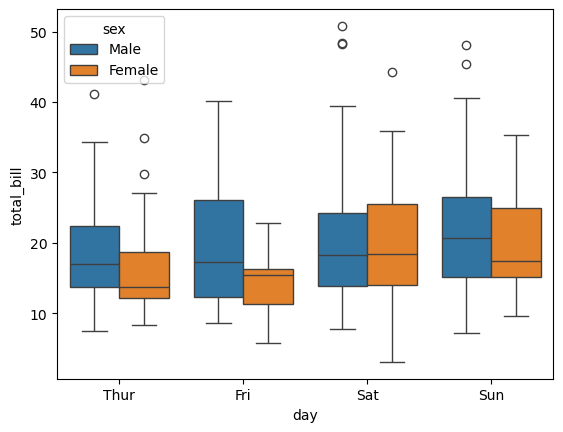

In [99]:
# hue
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex')

<Axes: ylabel='total_bill'>

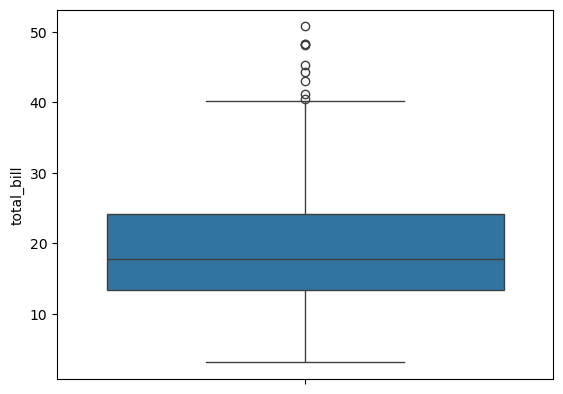

In [101]:
# single boxplot -> numerical col
sns.boxplot(data=tips,y='total_bill')

### Violinplot = (Boxplot + KDEplot)

<Axes: xlabel='day', ylabel='total_bill'>

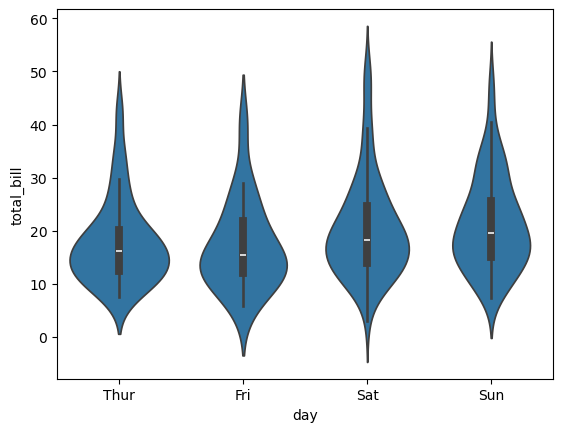

In [104]:
# violinplot
sns.violinplot(data=tips,x='day',y='total_bill')

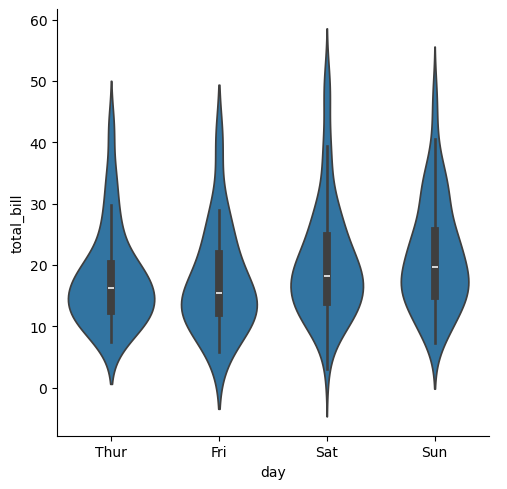

In [106]:
sns.catplot(data=tips,x='day',y='total_bill',kind='violin')

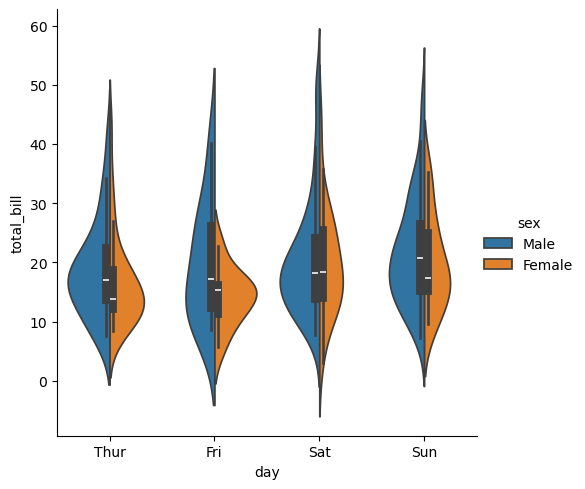

In [108]:
# hue

sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex',split=True)

<Axes: xlabel='sex', ylabel='total_bill'>

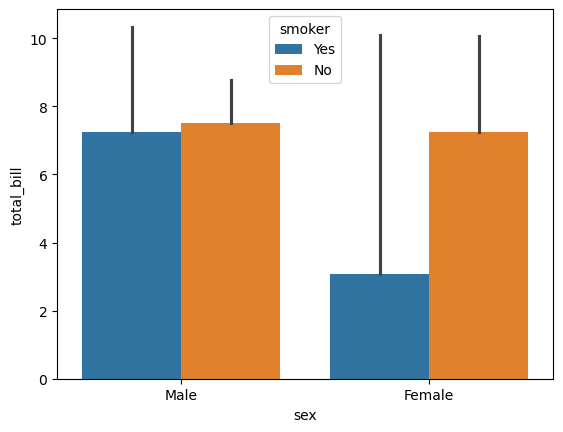

In [110]:
# barplot
# some issue with errorbar
import numpy as np
sns.barplot(data=tips, x='sex', y='total_bill',hue='smoker',estimator=np.min)

C:\Users\wwwsi\AppData\Local\Temp\ipykernel_9000\3522951494.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=tips, x='sex', y='total_bill',ci=None)


<Axes: xlabel='sex', ylabel='total_bill'>

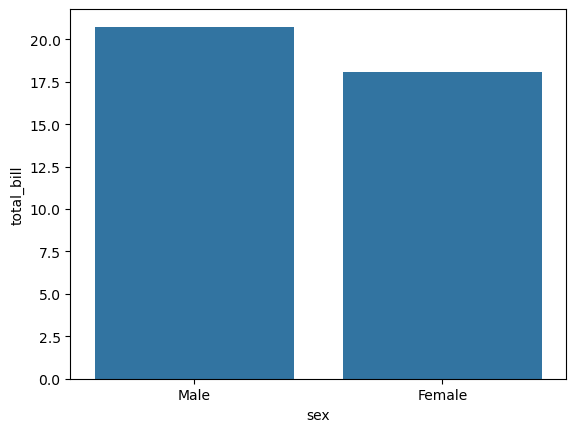

In [112]:
sns.barplot(data=tips, x='sex', y='total_bill',ci=None)

C:\Users\wwwsi\AppData\Local\Temp\ipykernel_9000\2657825262.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=tips, x='sex', y='total_bill',hue='smoker',ci=None)


<Axes: xlabel='sex', ylabel='total_bill'>

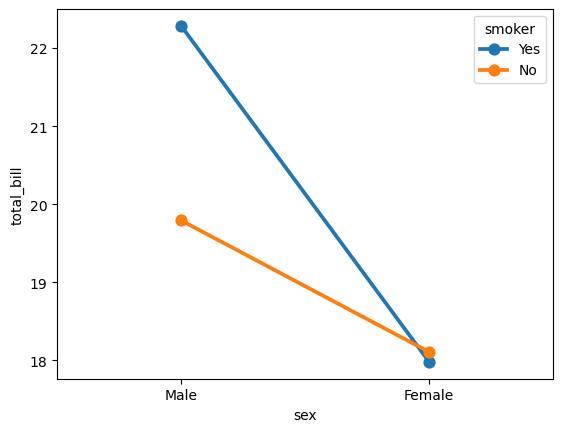

In [114]:
# point plot
sns.pointplot(data=tips, x='sex', y='total_bill',hue='smoker',ci=None)

<Axes: xlabel='sex', ylabel='count'>

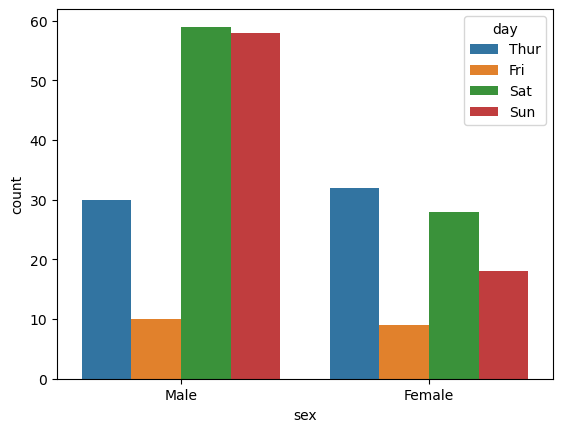

In [116]:
# countplot
sns.countplot(data=tips,x='sex',hue='day')

# pointplot

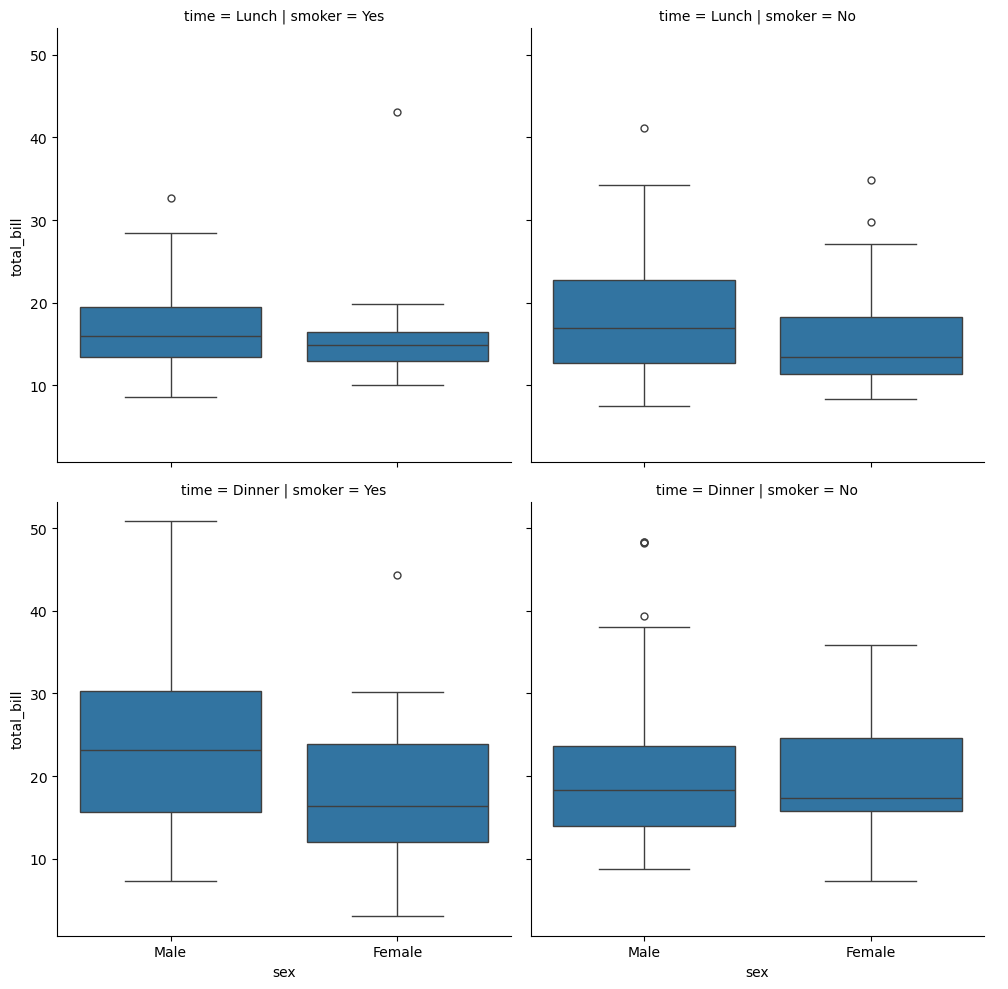

In [119]:
# faceting using catplot
sns.catplot(data=tips, x='sex',y='total_bill',col='smoker',kind='box',row='time')

### Regression Plots

- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<Axes: xlabel='total_bill', ylabel='tip'>

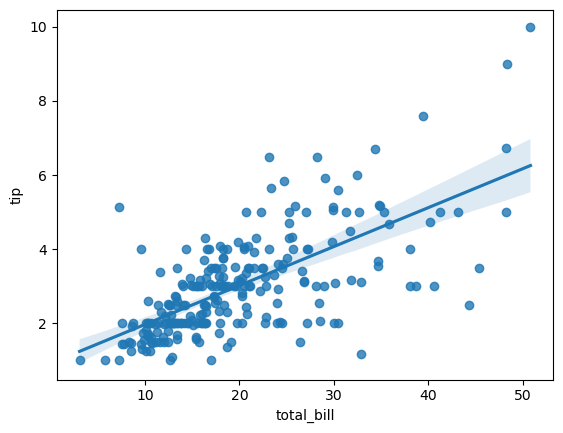

In [122]:
# axes level
# hue parameter is not available
sns.regplot(data=tips,x='total_bill',y='tip')

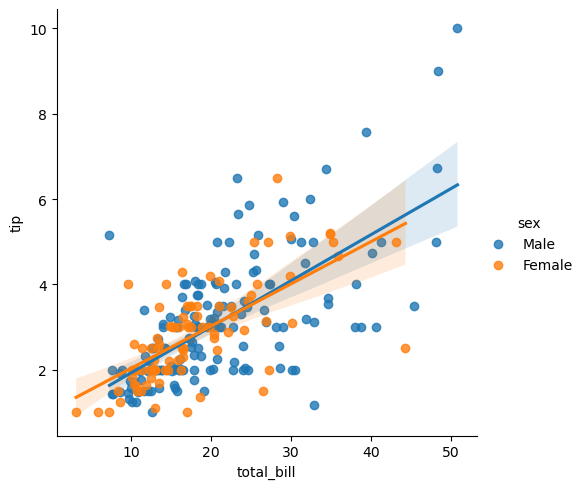

In [124]:
sns.lmplot(data=tips,x='total_bill',y='tip',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

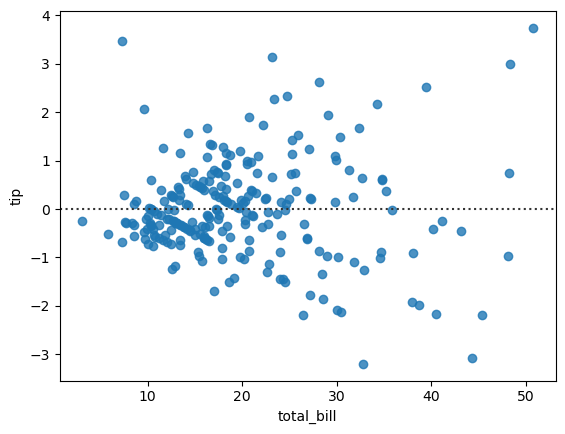

In [126]:
# residplot
sns.residplot(data=tips,x='total_bill',y='tip')

### A second way to plot Facet plots -> FacetGrid

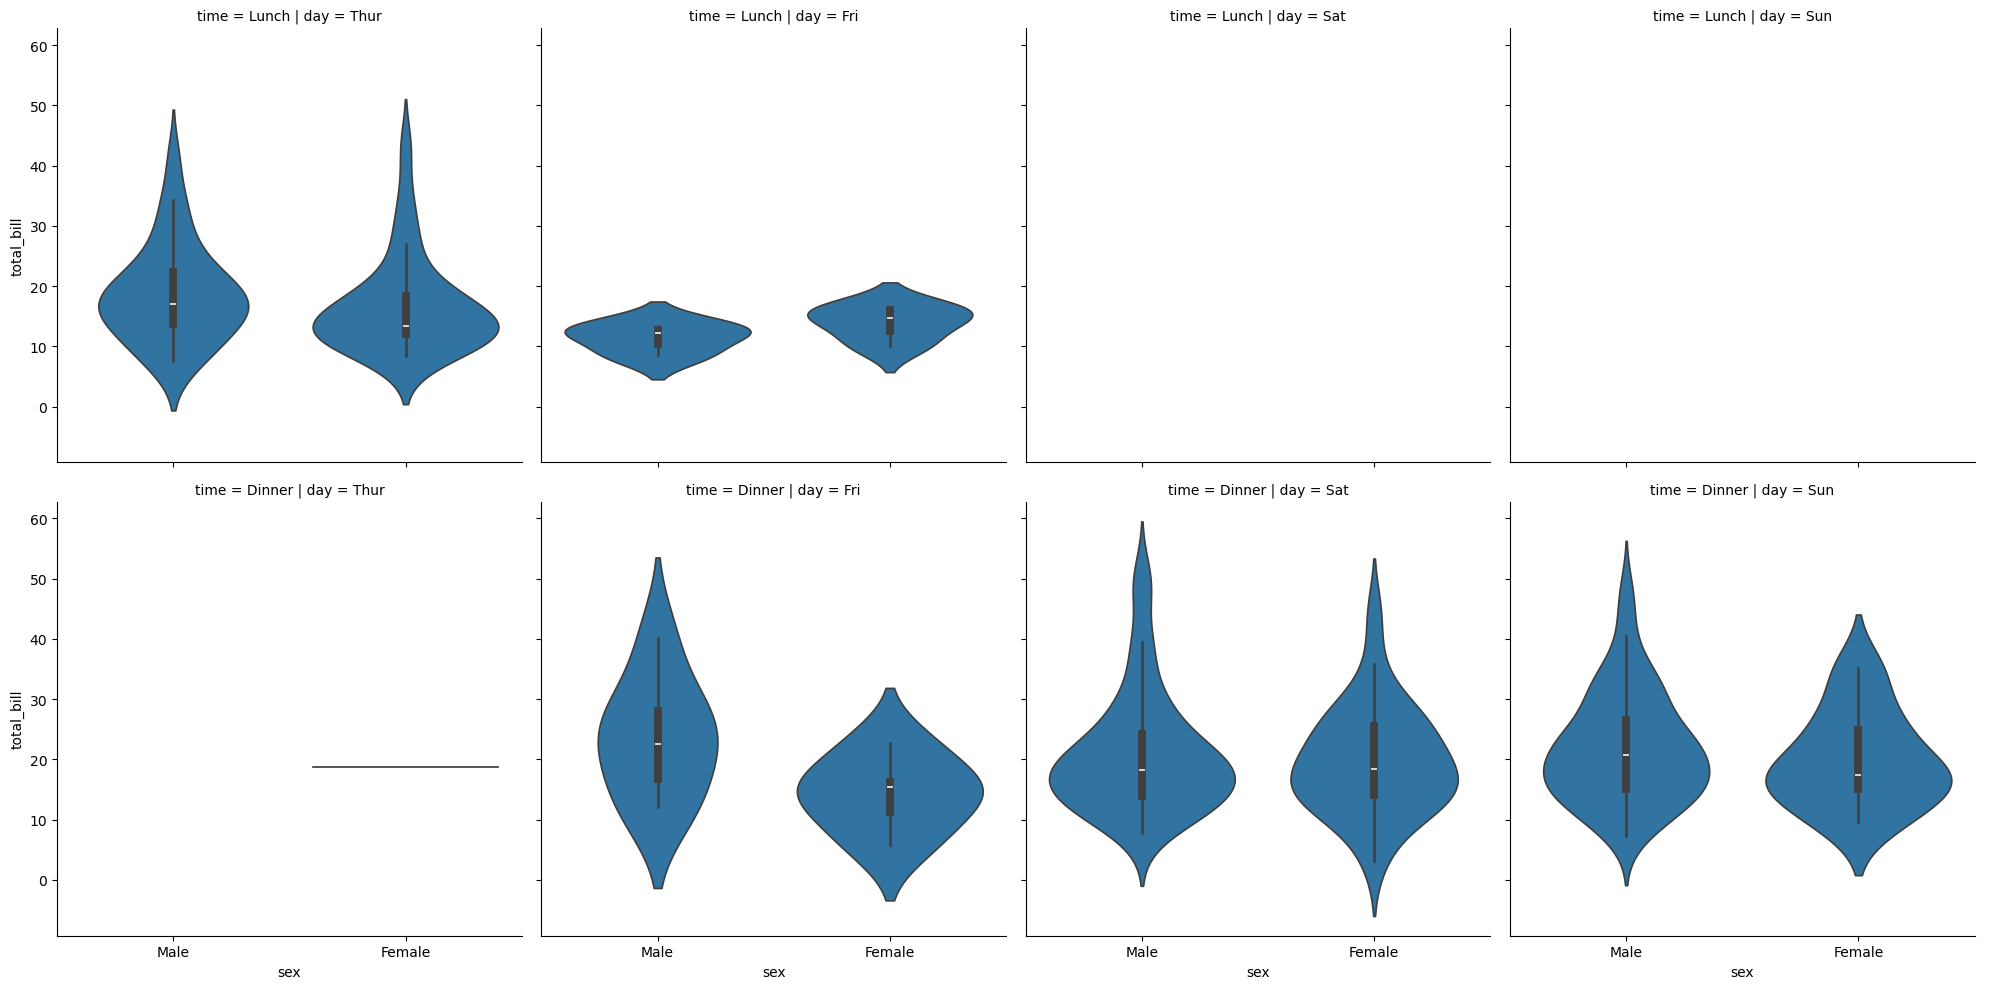

In [129]:
# figure level -> relplot -> displot -> catplot -> lmplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

C:\Users\wwwsi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: Axes.bxp() got an unexpected keyword argument 'label'

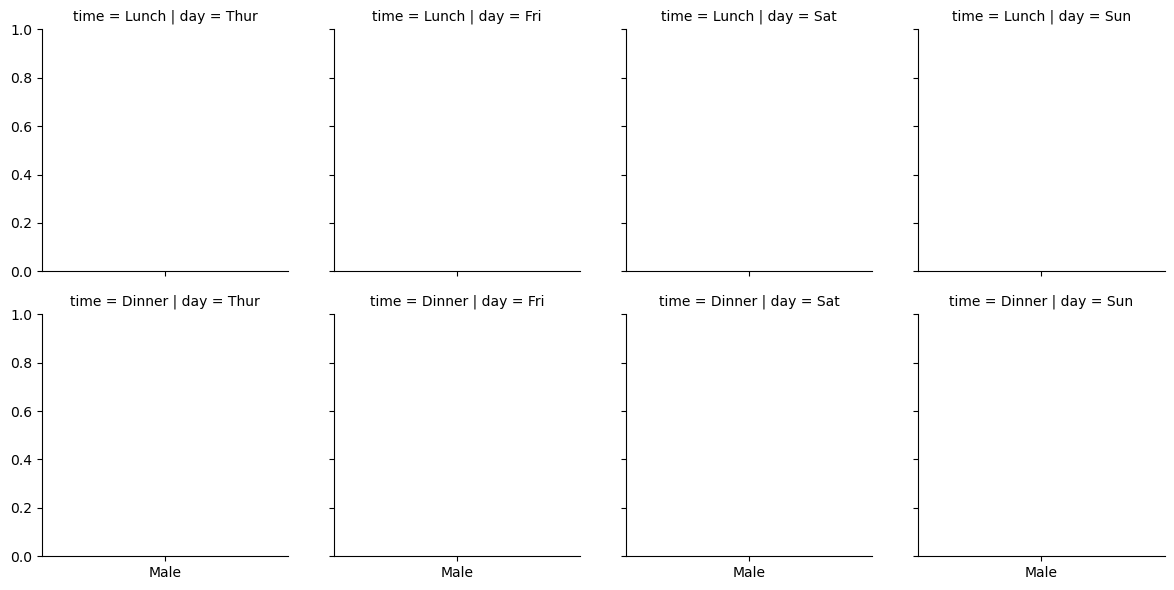

In [131]:
g = sns.FacetGrid(data=tips,col='day',row='time',hue='smoker')
g.map(sns.boxplot,'sex','total_bill')
g.add_legend()

### Plotting Pairwise Relationship (PairGrid Vs Pairplot)

*   List item
*   List item



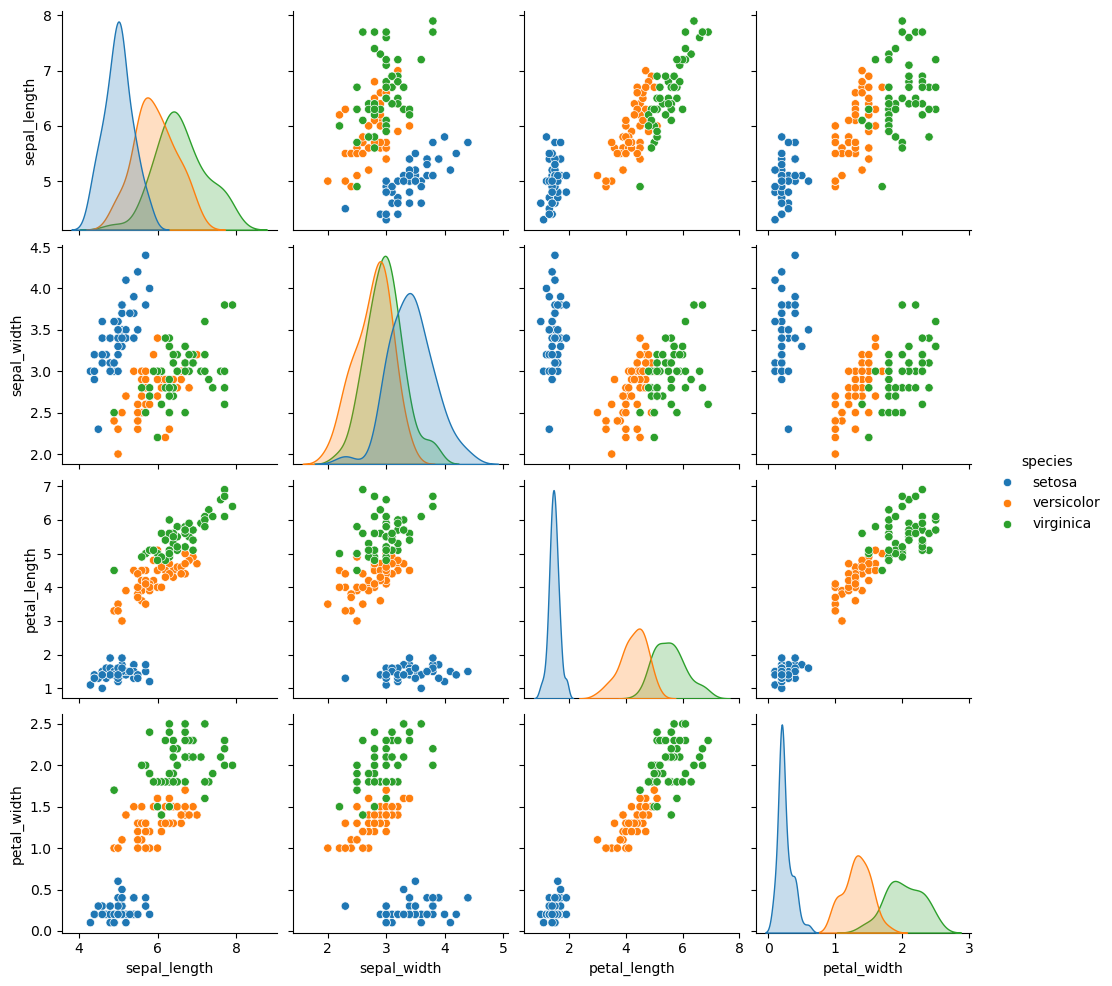

In [134]:
sns.pairplot(iris,hue='species')

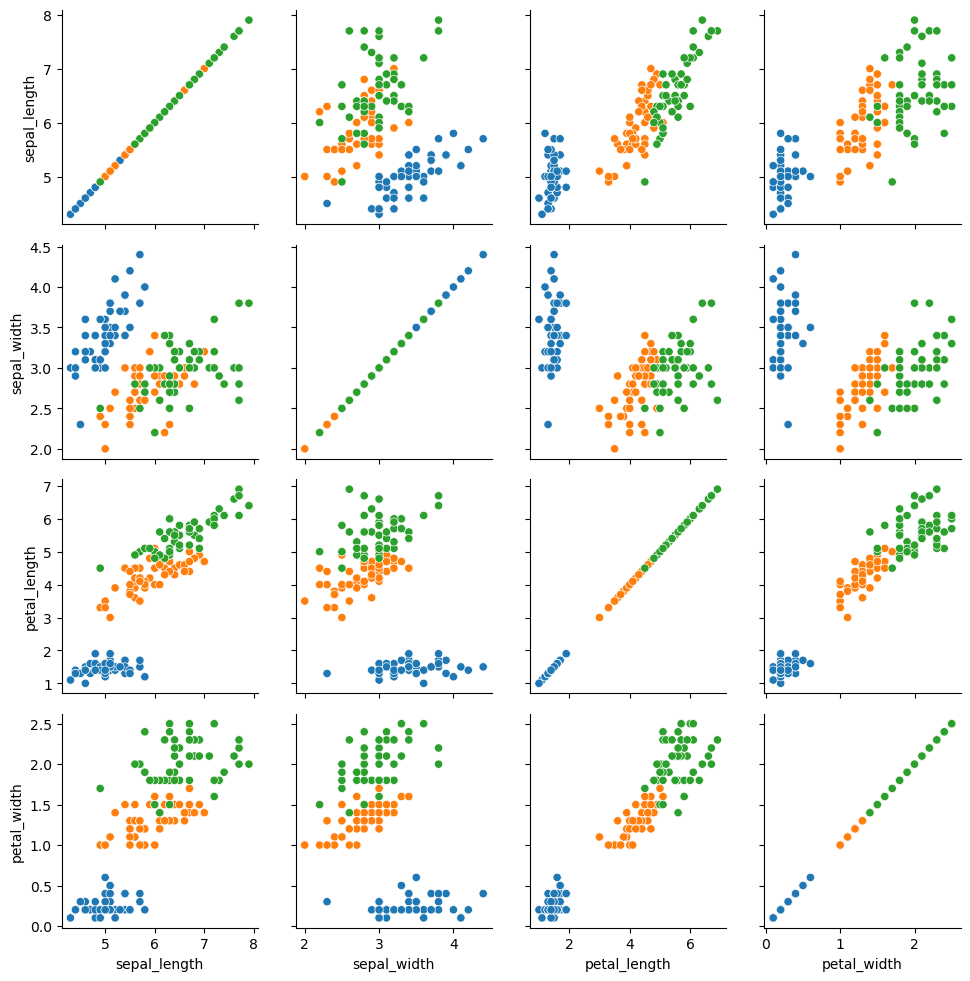

In [136]:
# pair grid
g = sns.PairGrid(data=iris,hue='species')
# g.map
g.map(sns.scatterplot)

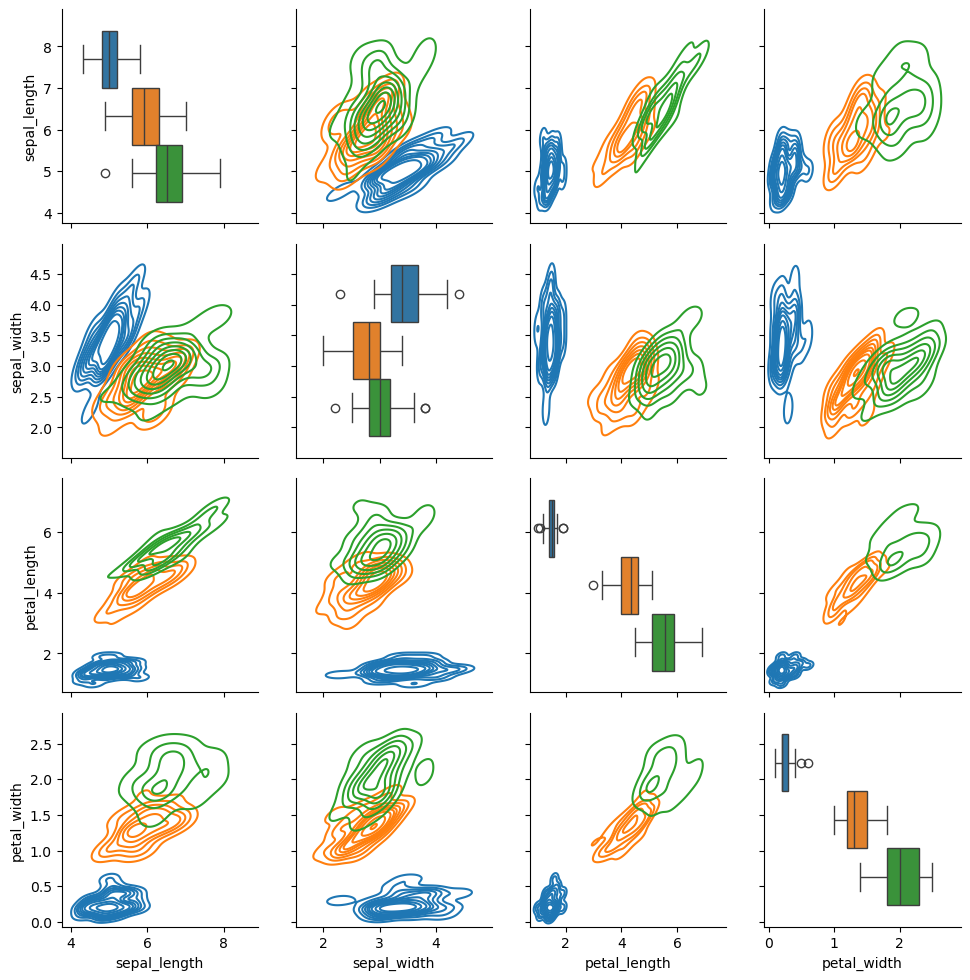

In [138]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.boxplot)
g.map_offdiag(sns.kdeplot)

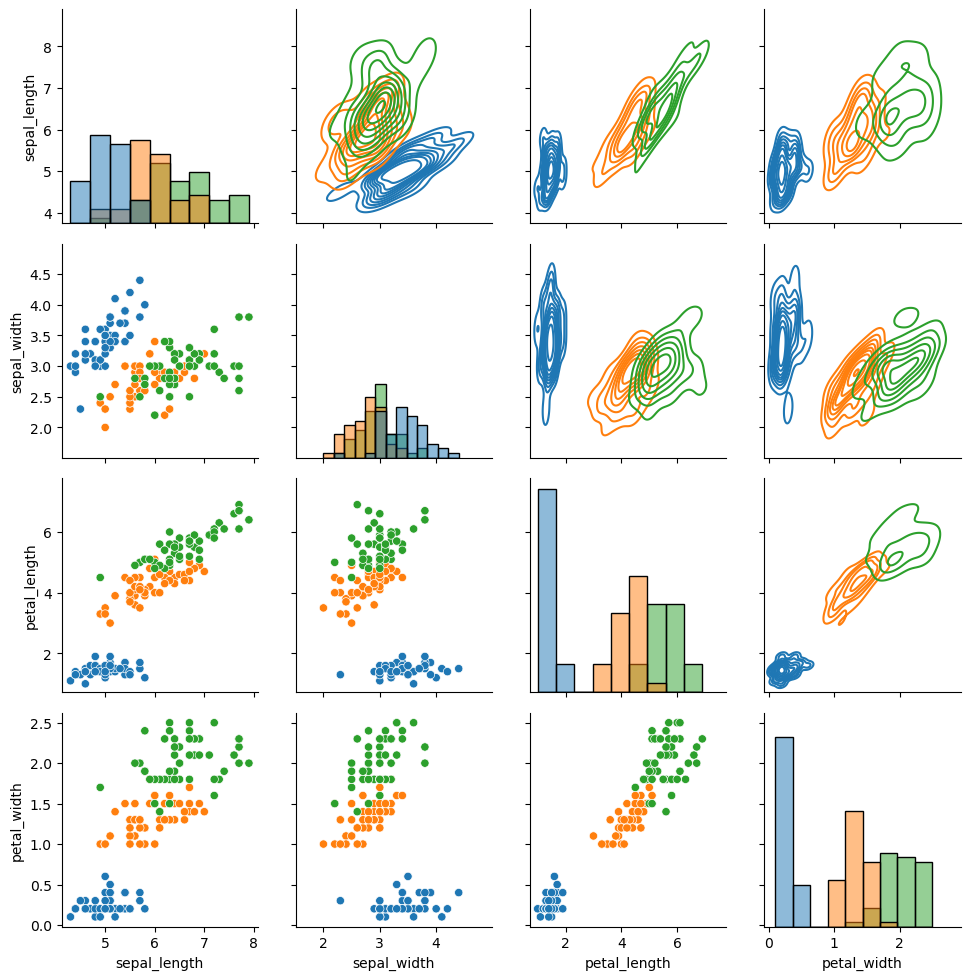

In [140]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

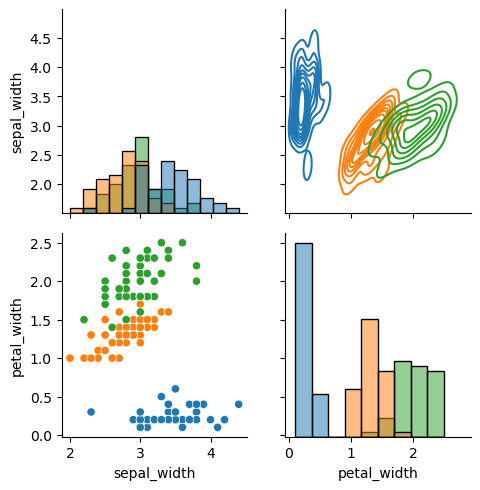

In [142]:
# vars
g = sns.PairGrid(data=iris,hue='species',vars=['sepal_width','petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

### JointGrid Vs Jointplot

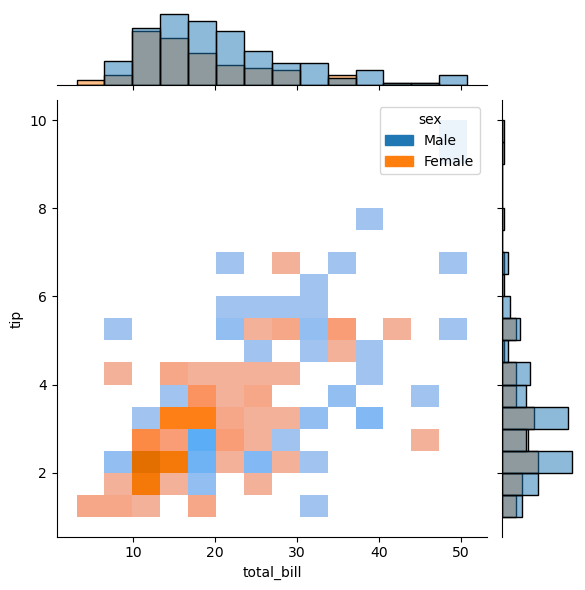

In [145]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='hist',hue='sex')

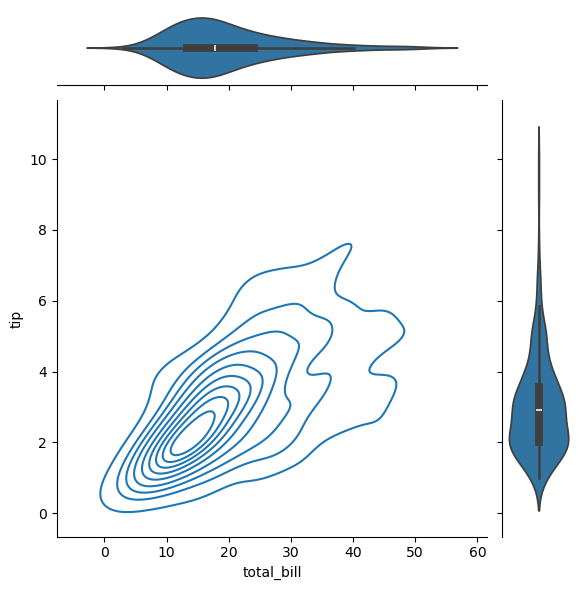

In [147]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.kdeplot,sns.violinplot)